<h1 style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #003366; background-color: #FFB6C1; padding: 20px; text-align: center; border-radius: 10px;">🌧️ Temperature Forecast Project using ML ☁️</h1>

<img src="https://media.tenor.com/nBR0EXu7hmoAAAAi/kawanimals-rain.gif" alt="Rain GIF" width="300">

## Project Description

This project involves building separate machine learning models to predict the minimum and maximum air temperatures for the next day. The dataset is derived from the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. It spans the summer seasons from 2013 to 2017 and includes various input features such as LDAPS model forecast data, present-day in-situ temperatures, and geographic auxiliary variables. The two target outputs are next-day maximum and minimum air temperatures. Hindcast validation was conducted for the period from 2015 to 2017.

## Attribute Information

For more detailed information, refer to [Cho et al, 2020].

1. **station:** Used weather station number (1 to 25)
2. **Date:** Present day in the format yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. **Present_Tmax:** Maximum air temperature between 0 and 21 h on the present day (°C): Ranges from 20 to 37.6
4. **Present_Tmin:** Minimum air temperature between 0 and 21 h on the present day (°C): Ranges from 11.3 to 29.9
5. **LDAPS_RHmin:** LDAPS model forecast of next-day minimum relative humidity (%): Ranges from 19.8 to 98.5
6. **LDAPS_RHmax:** LDAPS model forecast of next-day maximum relative humidity (%): Ranges from 58.9 to 100
7. **LDAPS_Tmax_lapse:** LDAPS model forecast of next-day maximum air temperature applied lapse rate (°C): Ranges from 17.6 to 38.5
8. **LDAPS_Tmin_lapse:** LDAPS model forecast of next-day minimum air temperature applied lapse rate (°C): Ranges from 14.3 to 29.6
9. **LDAPS_WS:** LDAPS model forecast of next-day average wind speed (m/s): Ranges from 2.9 to 21.9
10. **LDAPS_LH:** LDAPS model forecast of next-day average latent heat flux (W/m2): Ranges from -13.6 to 213.4
11. **LDAPS_CC1 to LDAPS_CC4:** LDAPS model forecast of next-day 1st to 4th 6-hour split average cloud cover (0-5 h to 18-23 h) (%): Ranges from 0 to 0.98
12. **LDAPS_PPT1 to LDAPS_PPT4:** LDAPS model forecast of next-day 1st to 4th 6-hour split average precipitation (0-5 h to 18-23 h) (%): Ranges from 0 to 23.7
13. **lat:** Latitude (°): Ranges from 37.456 to 37.645
14. **lon:** Longitude (°): Ranges from 126.826 to 127.135
15. **DEM:** Elevation (m): Ranges from 12.4 to 212.3
16. **Slope:** Slope (°): Ranges from 0.1 to 5.2
17. **Solar radiation:** Daily incoming solar radiation (wh/m2): Ranges from 4329.5 to 5992.9
18. **Next_Tmax:** The next-day maximum air temperature (°C): Ranges from 17.4 to 38.9
19. **Next_Tmin:** The next-day minimum air temperature (°C): Ranges from 11.3 to 29.8

**Dataset Link:** [temperature.csv](https://github.com/dsrscientist/Dataset2/raw/main/temperature.csv)


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [3]:
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], object: ['Date']}

- All variable are Numerical in nature.
- Next_Tmax and Next_Tmin are Target Variable.

## Statistical Analysis
#### Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.

In [4]:
df.duplicated().sum()

0

In [5]:
df.isin([' ','NA','-']).sum().any()

False

In [6]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
LDAPS_CC3                     75        0.967492
LDAPS_PPT4                    75        0.967492
LDAPS_PPT2                    75        0.967492
LDAPS_PPT1                    75        0.967492
LDAPS_CC4                     75        0.967492
LDAPS_CC2                     75        0.967492
LDAPS_CC1                     75        0.967492
LDAPS_LH                      75        0.967492
LDAPS_WS                      75        0.967492
LDAPS_Tmin_lapse              75        0.967492
LDAPS_Tmax_lapse              75        0.967492
LDAPS_RHmax                   75        0.967492
LDAPS_RHmin                   75        0.967492
LDAPS_PPT3                    75        0.967492
Present_Tmin                  70        0.902993
Present_Tmax                  70        0.902993
Next_Tmax                     27        0.348297
Next_Tmin                     27        0.348297
Date                           2        0.025800
station             

### Handling Missing Values

Given that the dataset has missing values, and the percentage of missing values is less than 1% across the dataset, it is reasonable to directly drop these missing values.

In [7]:
print("We had {} Rows and {} Columns before dropping null values.".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} Columns after dropping null values.".format(df.shape[0], df.shape[1]))

We had 7752 Rows and 25 Columns before dropping null values.
We have 7588 Rows and 25 Columns after dropping null values.


In [8]:
# Converting Date datatypes and spliting date into date, month and year.
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887   69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890   51.937448  ...  37.6046   
2         30.091292         24.565633  6.138224   20.573050  ...  37.5776   
3         29.704629         23.326177  5.650050   65.727144  ...  37.6450   
4         29.113934         23.486480  5.735004  107.965535  ...  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  Day  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2   30   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5   30   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9   30   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3   30   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5   30   

   Month  Year  
0      6  2013  
1      6  2013  
2      6  2013  
3      6  2013  
4      6  2013  

[5 rows x 28 columns]

### Creating Additional Location Columns

To gain more insight into the data, we can create additional columns representing the location of each weather station in terms of city and respective state.


In [9]:
pip install reverse_geocoder

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
# Importing Reverse geocoder
import reverse_geocoder as rg
import pprint
geodata=[]
def reverse_geocoordinates(coordinates):
    result = rg.search(coordinates)
    return (result)

if __name__=="__main__":
    coordinates = list(zip(df['lat'], df['lon']))
    data = reverse_geocoordinates(coordinates)
    geodata.append(data)
# Creating dataframe for geographical name
geo_names = pd.DataFrame(geodata).transpose()

Loading formatted geocoded file...


In [11]:
df['State']= geo_names[0].apply(lambda x:x.get('admin1'))
df['City']=geo_names[0].apply(lambda x:x.get('name'))

In [12]:
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...       DEM  \
0         28.074101         23.006936  6.818887   69.451805  ...  212.3350   
1         29.850689         24.035009  5.691890   51.937448  ...   44.7624   
2         30.091292         24.565633  6.138224   20.573050  ...   33.3068   
3         29.704629         23.326177  5.650050   65.727144  ...   45.7160   
4         29.113934         23.486480  5.735004  107.965535  ...   35.0380   

    Slope  Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  \
0  2.7850      5992.895996       29.1       21.2   30      6  2013   
1  0.5141      5869.312500       30.5       22.5   30      6  2013   
2  0.2661      5863.555664       31.1       23.9   30      6  2013   
3  2.5348      5856.964844       31.7       24.3   30      6  2013   
4  0.5055      5859.552246       31.2       22.5   30      6  2013   

         State     City  
0        Seoul    Seoul  
1        Seoul    Seoul  
2        Seoul    Seoul  
3        Seoul    Seoul  
4  Gyeonggi-do  Guri-si  

[5 rows x 30 columns]

In [13]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...          lat         lon          DEM        Slope  \
count  7588.000000  ...  7588.000000  7588.00000  7588.000000  7588.000000   
mean      0.368510  ...    37.544792   126.99142    61.918136     1.259755   
std       0.262260  ...     0.050428     0.07922    54.323529     1.372748   
min       0.000000  ...    37.456200   126.82600    12.370000     0.098500   
25%       0.146546  ...    37.510200   126.93700    28.700000     0.271300   
50%       0.315706  ...    37.550700   126.99500    45.716000     0.618000   
75%       0.574174  ...    37.577600   127.04200    59.832400     1.767800   
max       0.967277  ...    37.645000   127.13500   212.335000     5.178200   

       Solar radiation    Next_Tmax    Next_Tmin          Day        Month  \
count      7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean       5343.724208    30.241526    22.910820    16.337375     7.068134   
std         429.782561     3.111807     2.482256     8.216880     2.242389   
min        4329.520508    17.400000    11.300000     7.000000     1.000000   
25%        5001.485717    28.200000    21.300000     8.000000     7.000000   
50%        5441.987305    30.400000    23.100000    16.000000     7.000000   
75%        5729.485840    32.600000    24.600000    24.000000     8.000000   
max        5992.895996    38.900000    29.800000    31.000000    12.000000   

              Year  
count  7588.000000  
mean   2014.991697  
std       1.410877  
min    2013.000000  
25%    2014.000000  
50%    2015.000000  
75%    2016.000000  
max    2017.000000  

[8 rows x 27 columns]

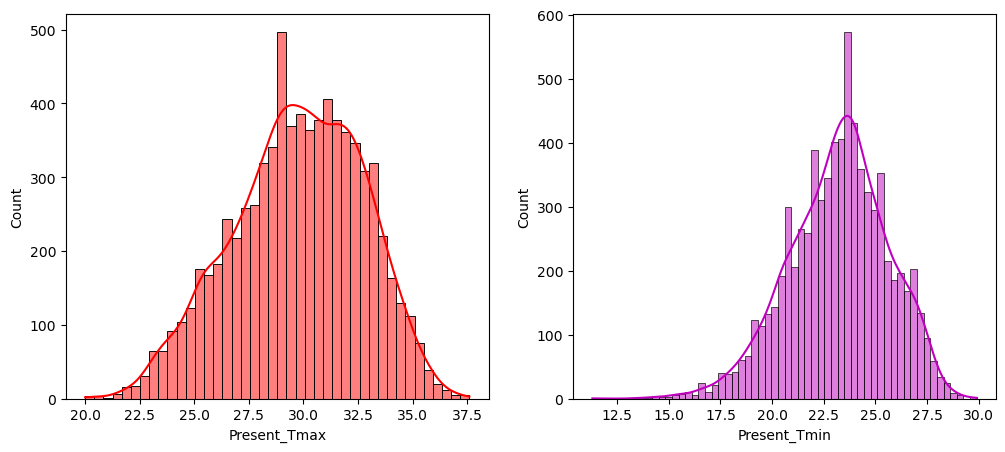

In [14]:
# Plotting histogram for present_Tmax and present_Tmin variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color='m')
plt.show()

### Data Observation

- For the majority of readings, the Present Temperature Maximum varies in the range of 27.5 to 32.5 degrees.
- Similarly, for the majority of readings, the Present Temperature Minimum varies in the range of 22.5 to 26 degrees.


In [15]:
#Lets find out maximum and minimum Temperature over period
print('Present Maximum Temperature Maxima in year 2013-2016 :',df.Present_Tmax.max())
print('Present Maximum Temperature Minima in year 2013-2016 :',df.Present_Tmax.min())
print(' Average Present Maximum Temperature in year 2013-2016 :',df.Present_Tmax.mean())
print('='*100)
print('Present Minimum Temperature Maxima in year 2013-2016 :',df.Present_Tmin.max())
print('Present Minimum Temperature Minima in year 2013-2016 :',df.Present_Tmin.min())
print('Average Present Minimum Temperature in year 2013-2016 :',df.Present_Tmin.mean())

Present Maximum Temperature Maxima in year 2013-2016 : 37.6
Present Maximum Temperature Minima in year 2013-2016 : 20.0
 Average Present Maximum Temperature in year 2013-2016 : 29.748365840801263
Present Minimum Temperature Maxima in year 2013-2016 : 29.9
Present Minimum Temperature Minima in year 2013-2016 : 11.3
Average Present Minimum Temperature in year 2013-2016 : 23.195809172377437


In [16]:
#Checking where actually these minima and maxima occur
pd.set_option('display.max_columns', None)
df.loc[df.Present_Tmax==df.Present_Tmax.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
5717     18.0 2016-11-08          37.6          26.8    44.254253   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
5717    87.745514         34.794021         27.150764  6.366598  111.225118   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
5717   0.218892   0.094288   0.004283   0.000343         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
5717         0.0         0.0  37.4832  127.024  56.4448  1.2313   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year        State  \
5717      5082.563477       37.0       27.8    8     11  2016  Gyeonggi-do   

            City  
5717  Bucheon-si

In [17]:
df.loc[df.Present_Tmax==df.Present_Tmax.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7725      1.0 2017-08-30          20.0          15.1    35.652172   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
7725     89.97319         24.323737         16.128899  7.087329  108.981108   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
7725   0.046182   0.014955        0.0    0.00063         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
7725         0.0         0.0  37.6046  126.991  212.335  2.785   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year State City  
7725       4614.76123       23.8       15.1   30      8  2017   NaN  NaN

In [18]:
df.loc[df.Present_Tmin==df.Present_Tmin.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
2397     23.0 2014-02-08          35.3          29.9    53.946949   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
2397    85.985161         30.912804         25.439537  13.011129  117.837212   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
2397   0.684685   0.448827   0.762858   0.635728    1.670126    0.005681   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
2397    0.248885    0.003176  37.5372  126.891  15.5876  0.1554   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year        State  \
2397      5360.226563       31.3       24.8    8      2  2014  Gyeonggi-do   

         City  
2397  Guri-si

In [19]:
df.loc[df.Present_Tmin==df.Present_Tmin.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
6116     17.0 2016-08-27          27.1          11.3    62.793823   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
6116    91.726936         23.529546         17.963487  7.984566  84.48145   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
6116   0.668264   0.410536   0.452879   0.627238    0.181458         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
6116    0.405181    1.015573  37.6181  127.099  53.4712  0.697   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  State   City  
6116      4539.616699       24.6       17.1   27      8  2016  Seoul  Seoul

# Data Observations

1. The Present Maximum Temperature Maxima over the four-year span was recorded at station 18 on 2016-11-08 with a temperature of 37.6 degrees. Station 18 is located in Bucheon-si city of Gyeonggido state.

2. The Present Maximum Temperature Minima over the four-year span occurred at station 1 on 2017-08-30 with a temperature of 20 degrees.

3. The Present Maximum Temperature Maxima over the four-year span was recorded at station 23 on 2014-02-08 with a temperature of 29.9 degrees. Station 23 is located in Gurisi of Gyeonggido state.

4. The Present Maximum Temperature Minima over the four-year span occurred at station 17 on 2016-08-27 with a temperature of 11.3 degrees. Station 17 is located in Seoul city.

5. High solar radiation values are associated with high-temperature days, while low solar radiation values are associated with low-temperature days.

6. Maximum humidity tends to occur when global temperature minima occur, implying an inverse relationship between humidity and temperature. This relationship will be further investigated.

7. Solar radiation naturally has an effect on wind speed, precipitation, and humidity.


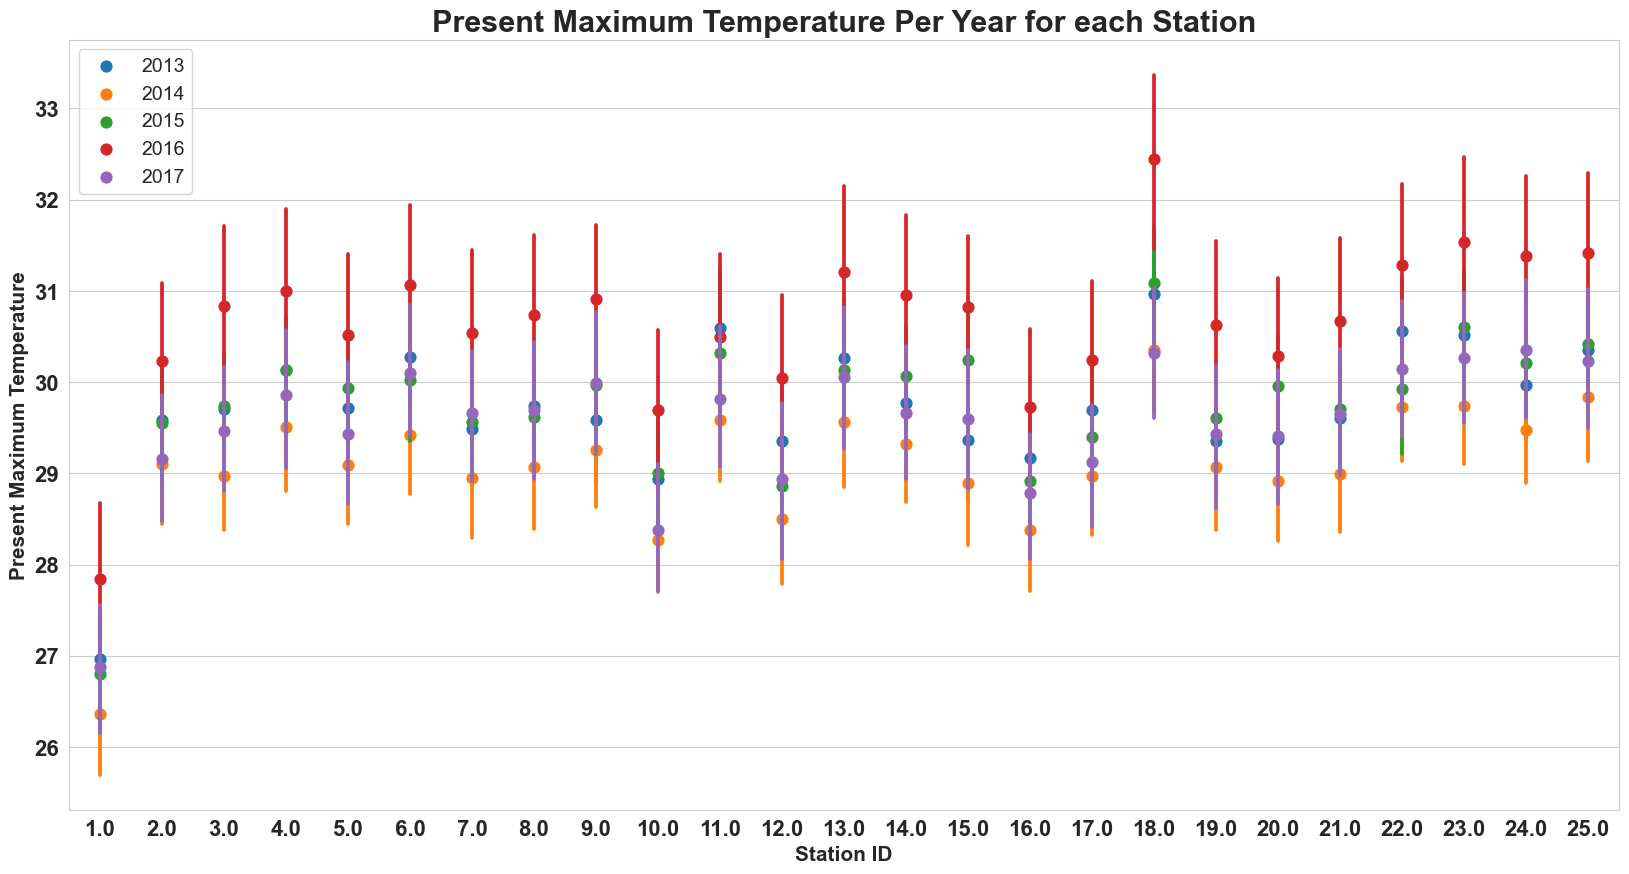

In [20]:
#Line Plot of Present Temperature Maximum over each Station

plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmax', data=df, hue='Year',join=False)
plt.title('Present Maximum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Maximum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

# Observations on Line Plot of Present Maximum Temperature

1. Over the four-year span, higher temperatures are consistently recorded at station 18 compared to other stations.

2. Station 1 consistently represents the coolest temperatures over the entire timeframe.

3. The line plot reveals that 2016 is the hottest year, with temperatures peaking across all stations.

4. In contrast, 2014 stands out as the coolest year based on the observed temperatures.

5. Notably, 2017 appears to be much cooler compared to 2016, providing a significant relief in temperatures for that year.

These observations highlight station-specific temperature variations and yearly temperature trends, indicating distinct temperature patterns across the four-year timeframe.


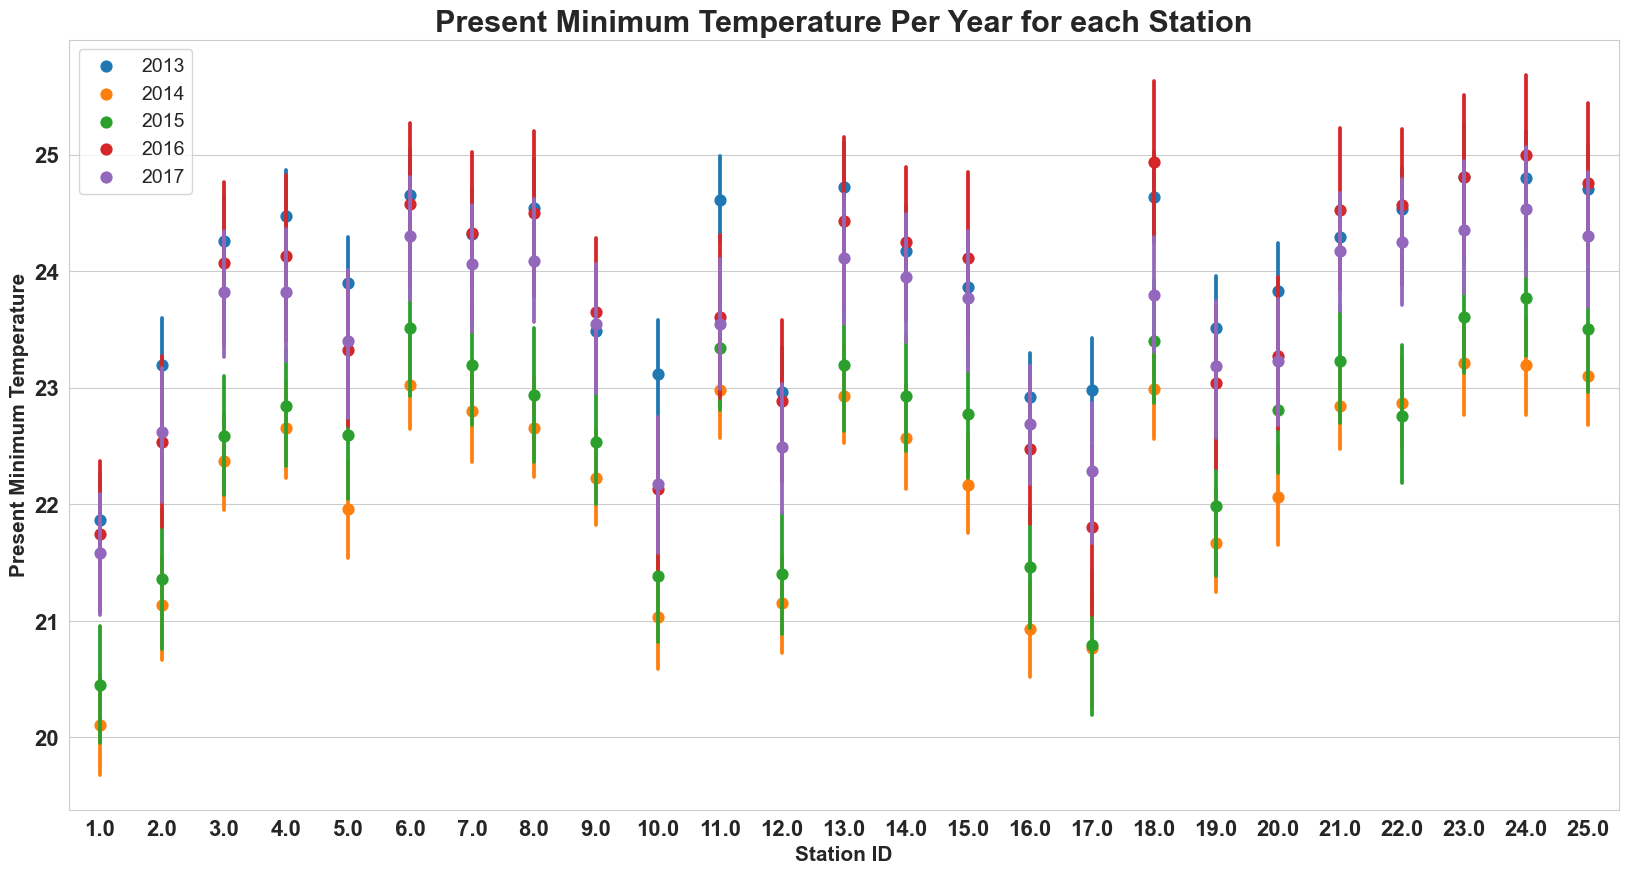

In [21]:
#Line Plot of Present Temperature Minimum over each Station

plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmin', data=df, hue='Year',join=False)
plt.title('Present Minimum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Minimum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

# Observations on Line Plot of Present Minimum Temperature

1. The year 2014 stands out as the coolest year across the entire timeframe based on the line plot of Present Minimum Temperature.

2. Interestingly, Station 24 recorded the highest Present Minimum Temperature despite not having the highest Present Maximum Temperature. This suggests that station 24 experiences a significant drop in temperature over the day period.

3. Station 1 consistently represents the coolest temperatures over the entire timeframe, followed by Station 17. These stations could be considered cooler spots, possibly attractive for tourism, especially during the summer.

These observations highlight variations in minimum temperatures across years, differences between maximum and minimum temperatures at specific stations, and the consistent coolness of certain stations.


<Axes: xlabel='Month', ylabel='Solar radiation'>

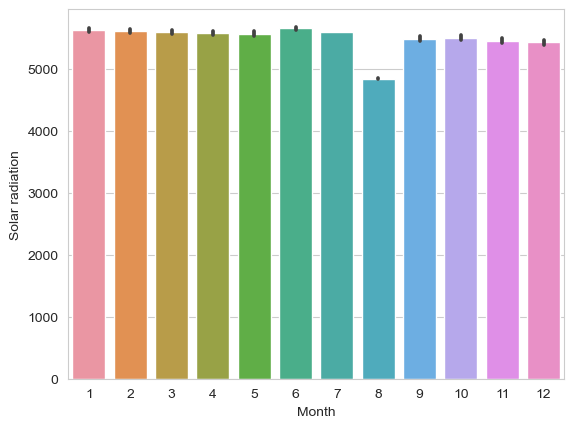

In [22]:
sns.barplot(x=df['Month'], y=df['Solar radiation'])

<Axes: xlabel='Next_Tmax', ylabel='Solar radiation'>

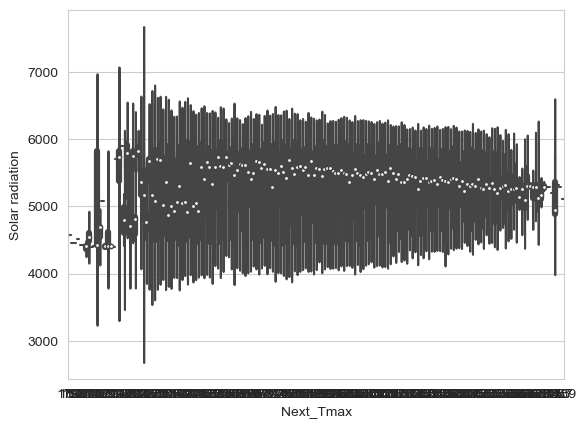

In [23]:
sns.violinplot(x=df['Next_Tmax'], y=df['Solar radiation'])

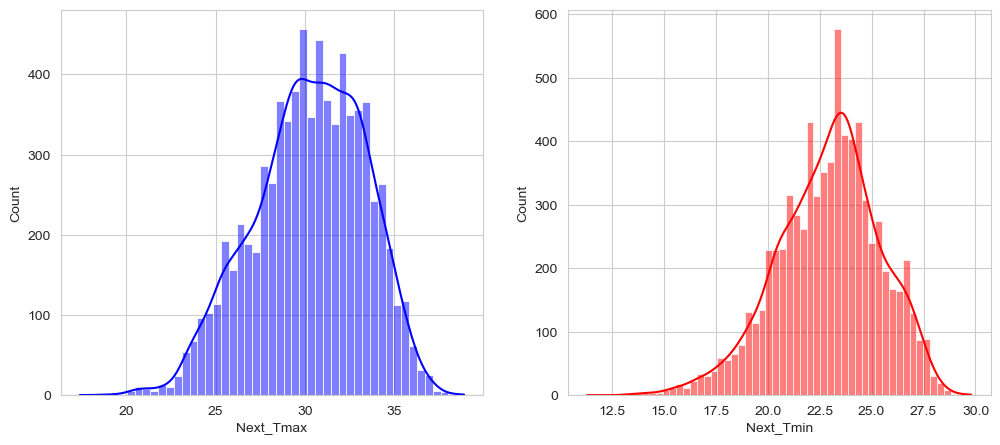

In [24]:
#Exploration of Target Variable
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmax'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmin'],kde=True,color='r')
plt.show()

# Comment

The observations for the Next Temperature (Maximum and Minimum) align with the findings for the Present Temperature:

- For the majority of readings, the Next Temperature Maximum varies in the range of 27.5 to 32.5 degrees.
- Similarly, for the majority of readings, the Next Temperature Minimum varies in the range of 22.5 to 26 degrees.

This consistency suggests a pattern in temperature ranges that persists across both present and next-day forecasts.

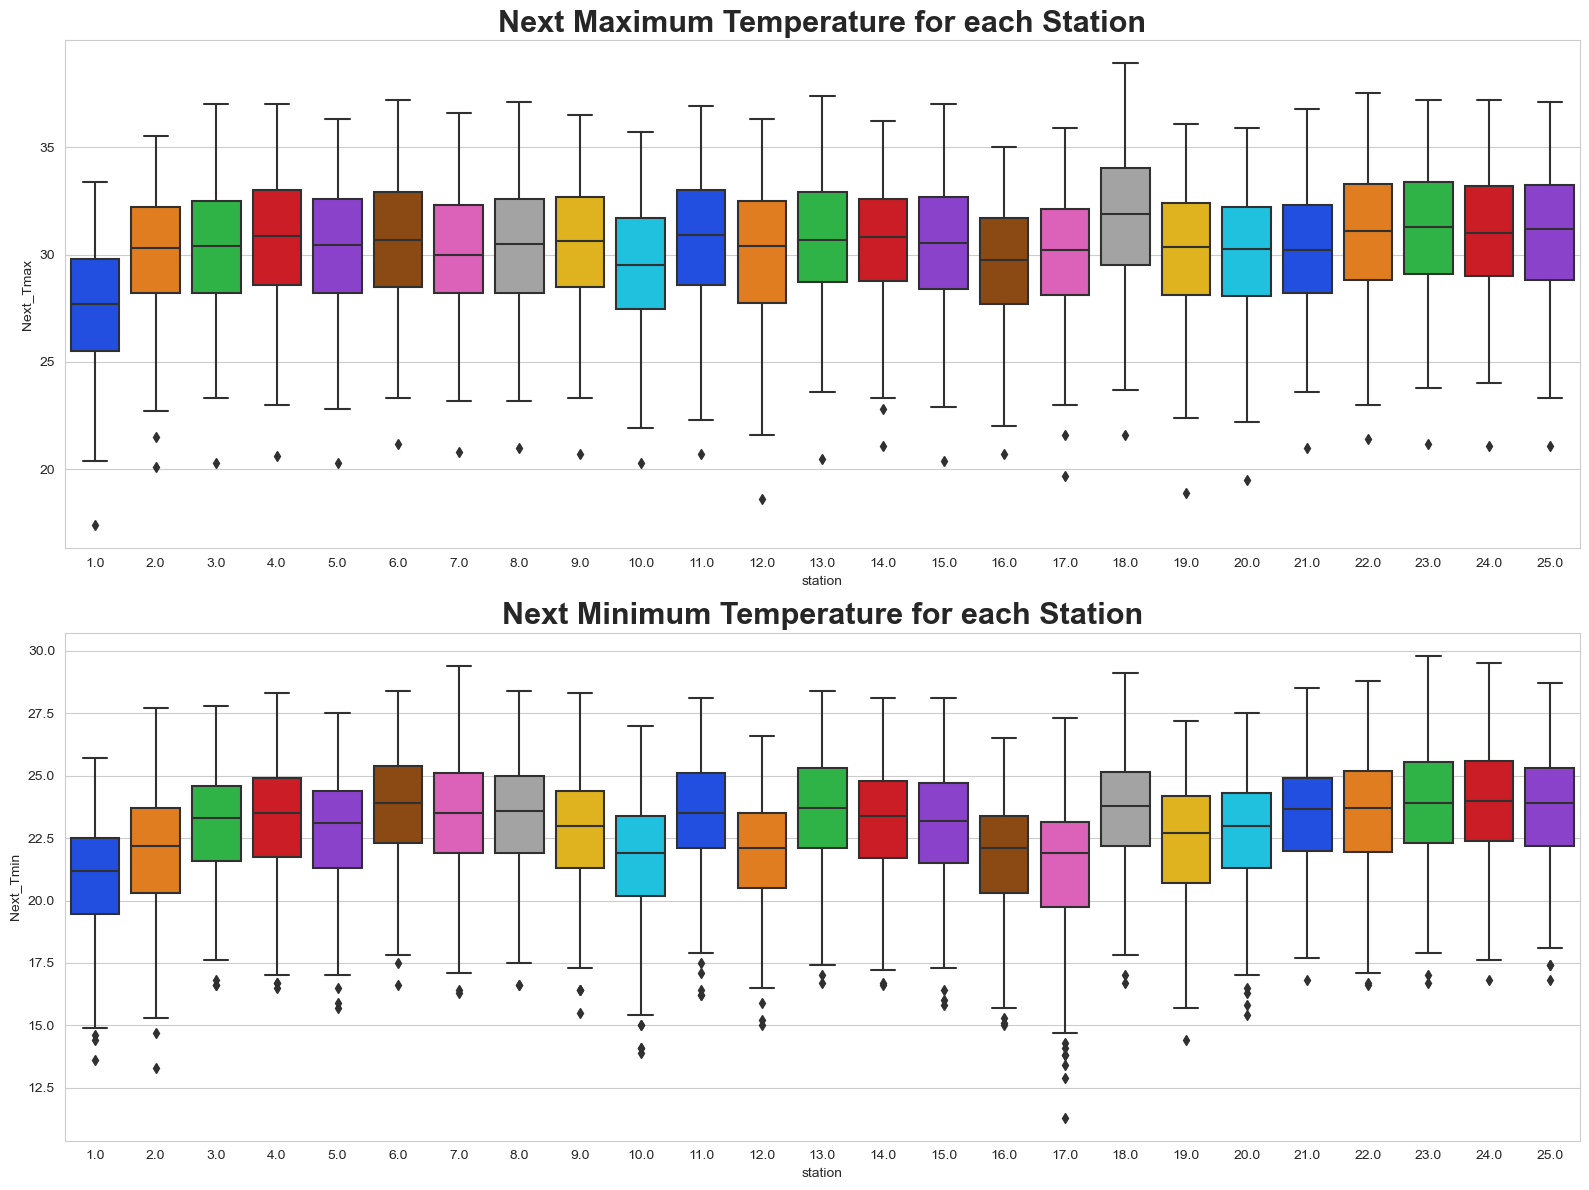

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))

plt.subplot(2, 1, 1)
sns.boxplot(x='station', y='Next_Tmax', data=df, palette='bright')
plt.title('Next Maximum Temperature for each Station', fontsize=22, fontweight='bold')

plt.subplot(2, 1, 2)
sns.boxplot(x='station', y='Next_Tmin', data=df, palette='bright')
plt.title('Next Minimum Temperature for each Station', fontsize=22, fontweight='bold')

plt.tight_layout()
plt.show()

# Observation from Box Plot

1. **Next_Tmax Observation:**
   - Station 18 consistently shows the highest collection of maximum temperatures (Next_Tmax).
   - The box plot highlights the temperature distribution at each station, with Station 18 having the widest range.

2. **Next_Tmin Observation:**
   - Similar to Next_Tmax, Station 18 has the highest collection of minimum temperatures (Next_Tmin).
   - The box plot indicates the temperature distribution at each station, and again, Station 18 stands out.

3. **Temperature Difference Observation:**
   - The maximum temperature difference between the maximum and minimum temperatures at the same station occurs at Station 17. This implies significant temperature variations at Station 17.

These observations provide insights into the temperature patterns at different weather stations, emphasizing the variability in both maximum and minimum temperatures.

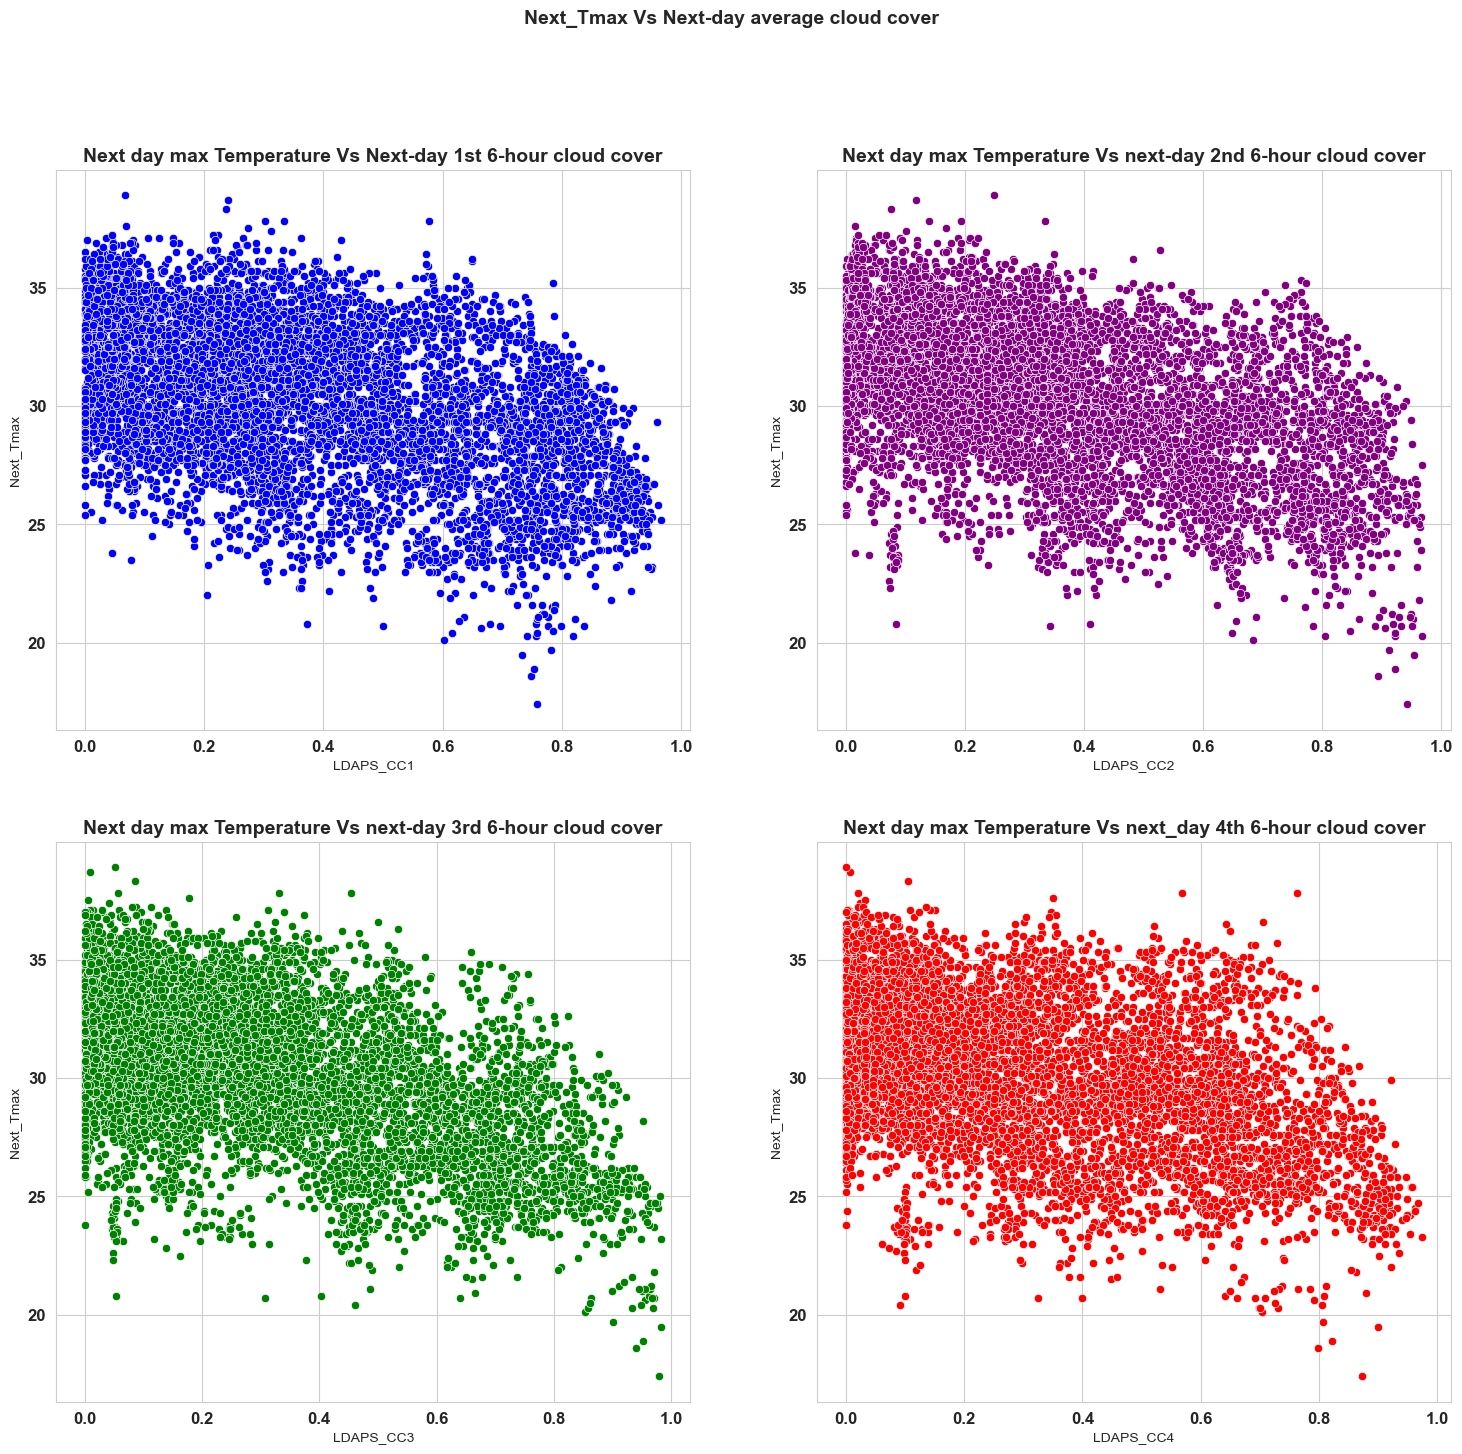

In [26]:
# Comparing Next day maximnum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmax Vs Next-day average cloud cover',fontsize=14, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=df,color="blue")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=df,color='purple')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day max Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=df,color='green')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day max Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmax',data=df,color="red")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

# Observation on Cloud Cover and Next-Day Maximum Temperature

Irrespective of the 6-hour quarter in a 24-hour day, there is a noticeable trend:
As cloud cover increases beyond 0.6, the Next-day Temperature Maximum consistently decreases.

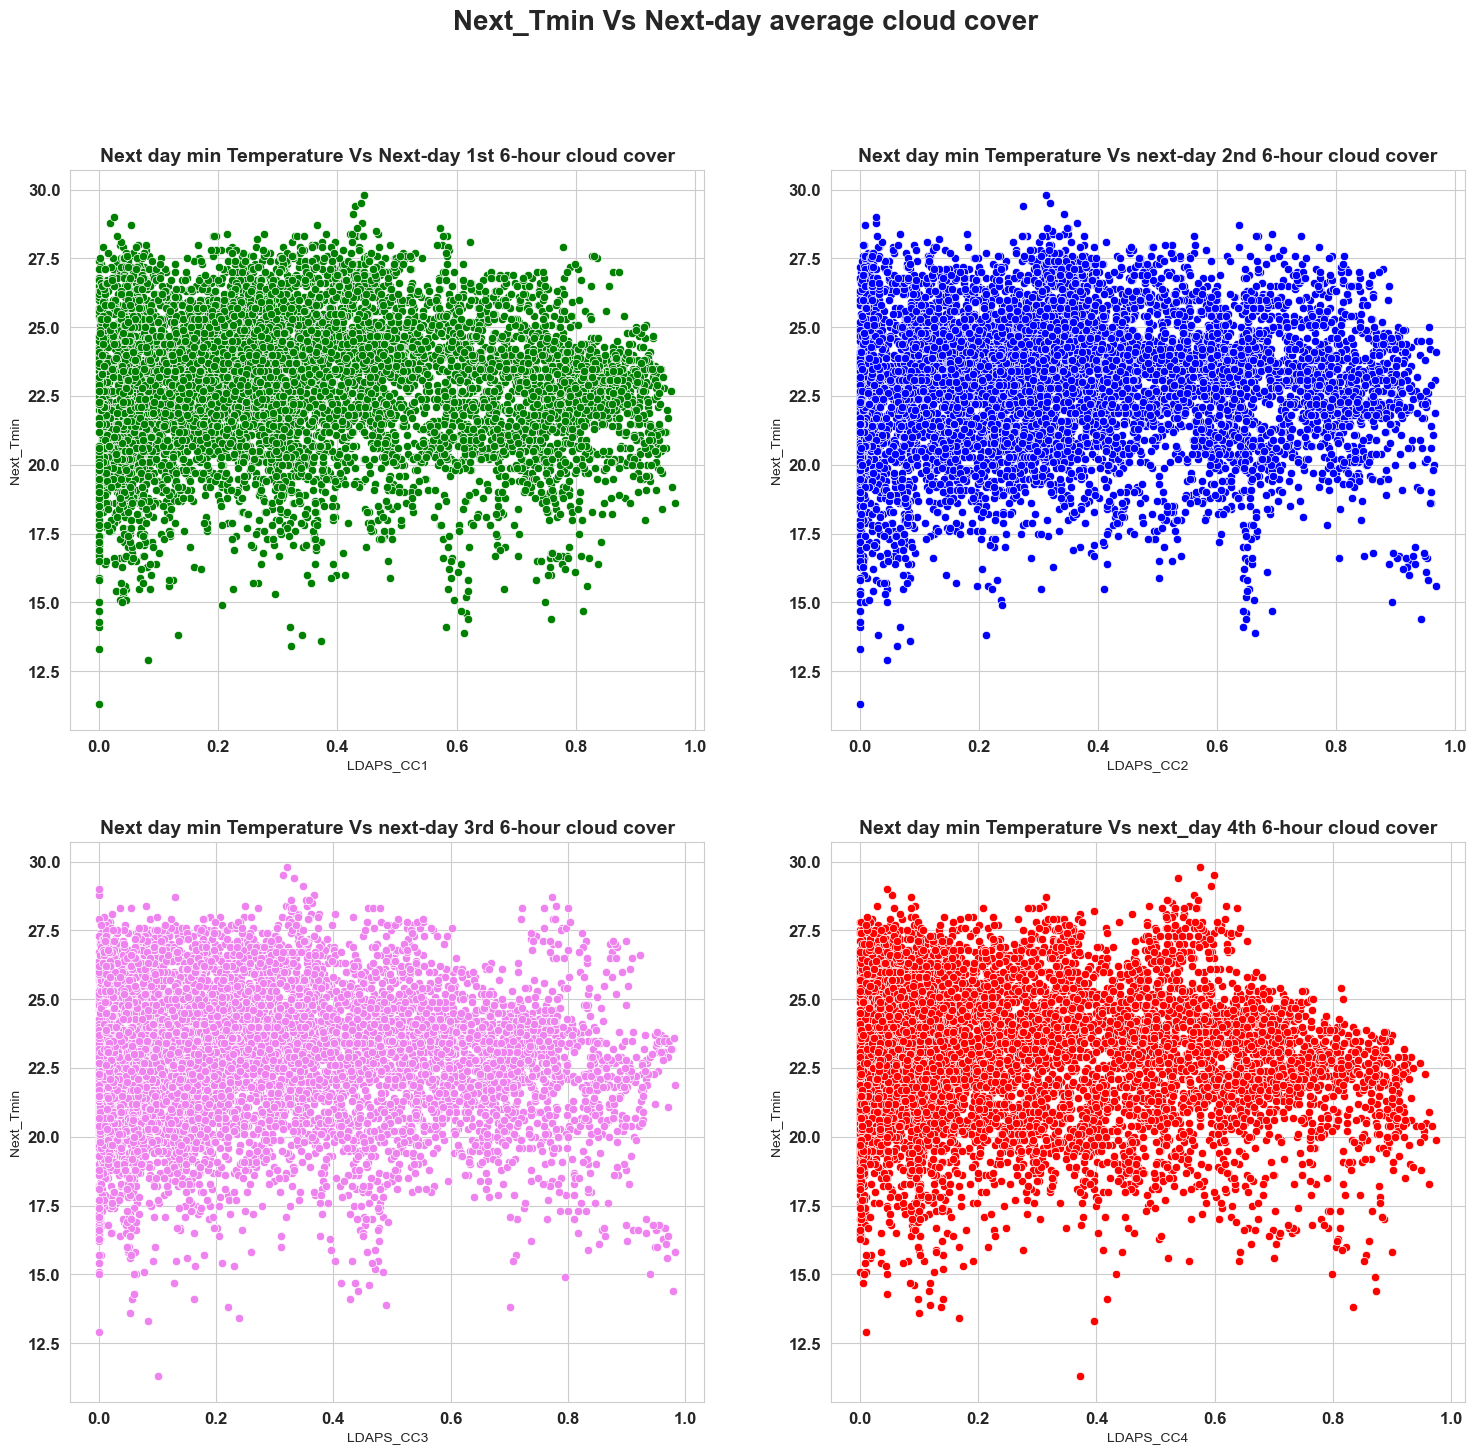

In [27]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmin Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day min Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmin',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

# Observation on Scatter Plot between Next_Tmin and Cloud Cover

In the scatter plot analysis, there is no significant relationship observed between Next_Tmin (Next-day Minimum Temperature) and cloud cover. It appears that Next_Tmin remains relatively unaffected by changes in cloud cover.

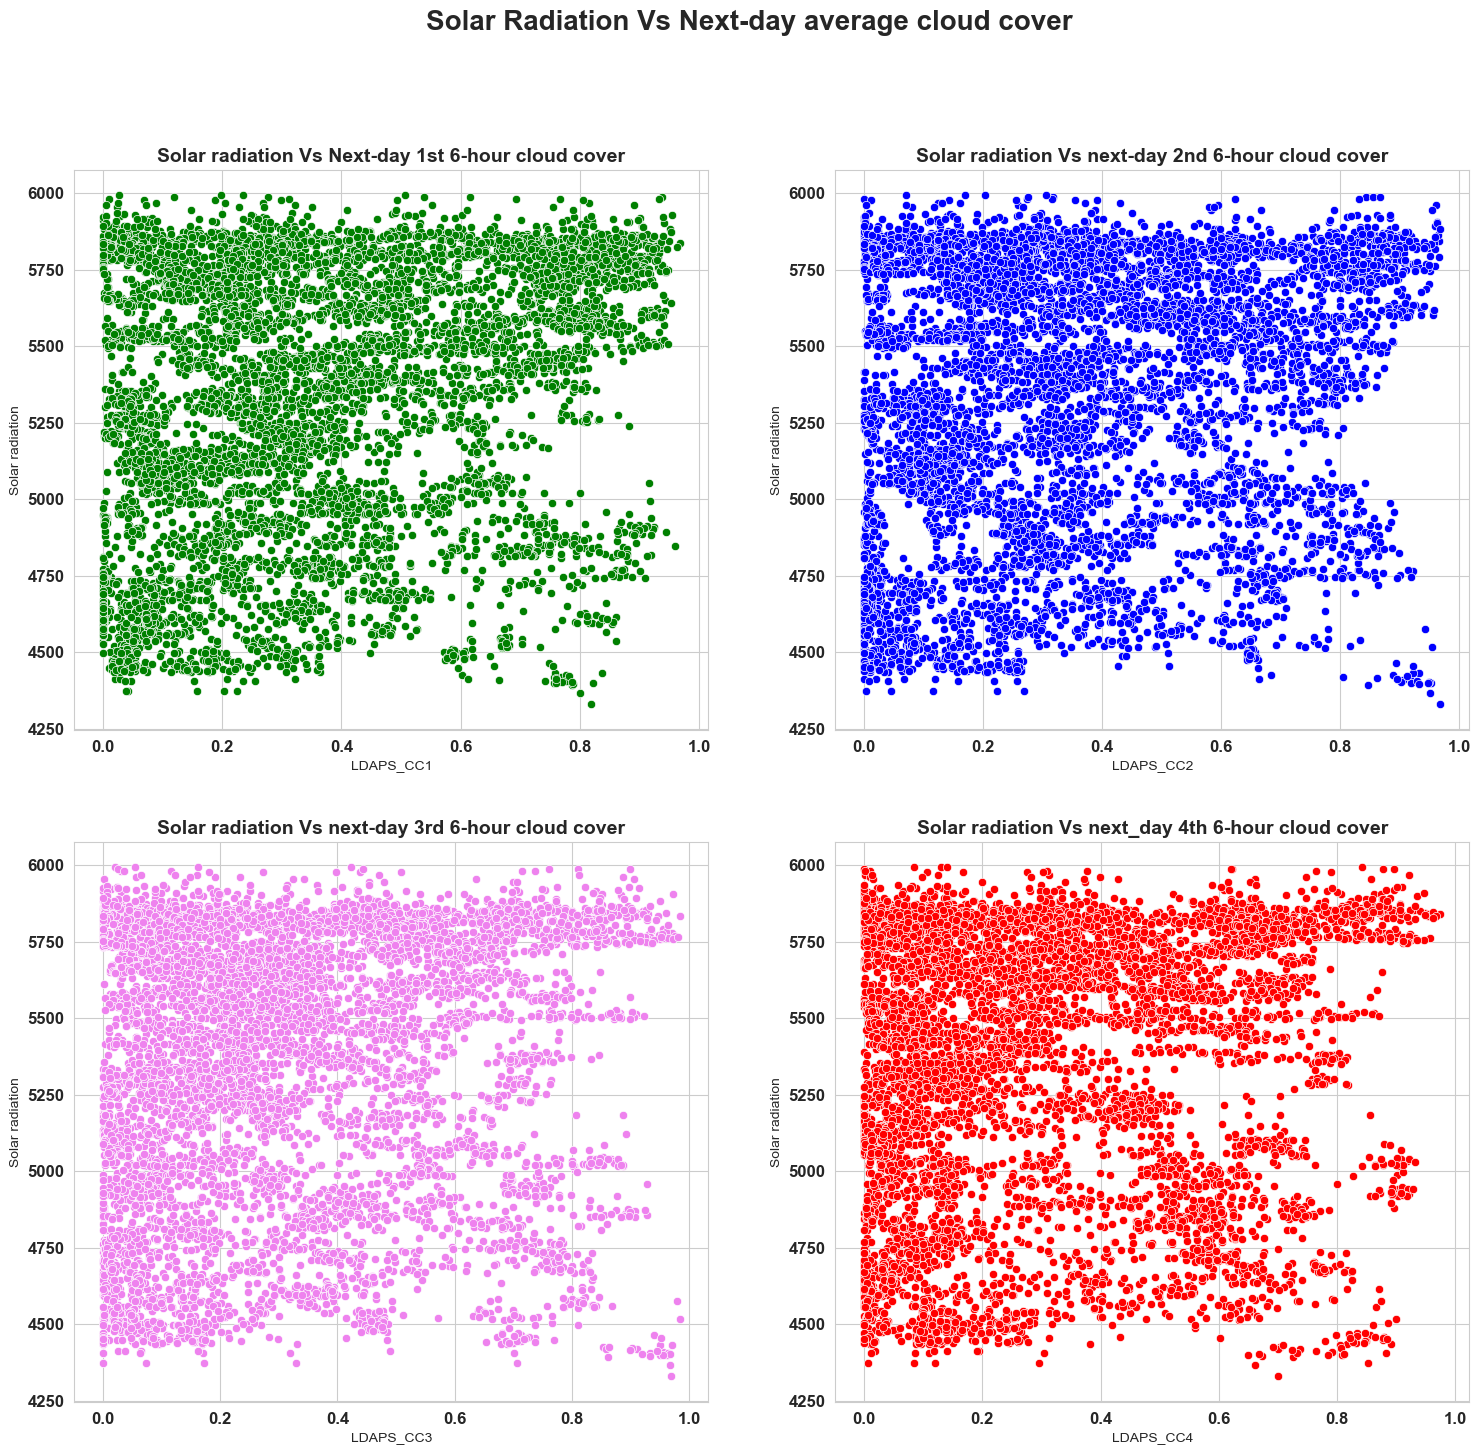

In [28]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Solar radiation',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Solar radiation',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Solar radiation',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Solar radiation',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

# Observation on Precipitation vs. Solar Radiation

It can be observed that for cloud cover greater than 0.7, high solar radiation values are predominant. This suggests a positive correlation between cloud cover and solar radiation. As cloud cover increases beyond 0.7, solar radiation tends to be higher.


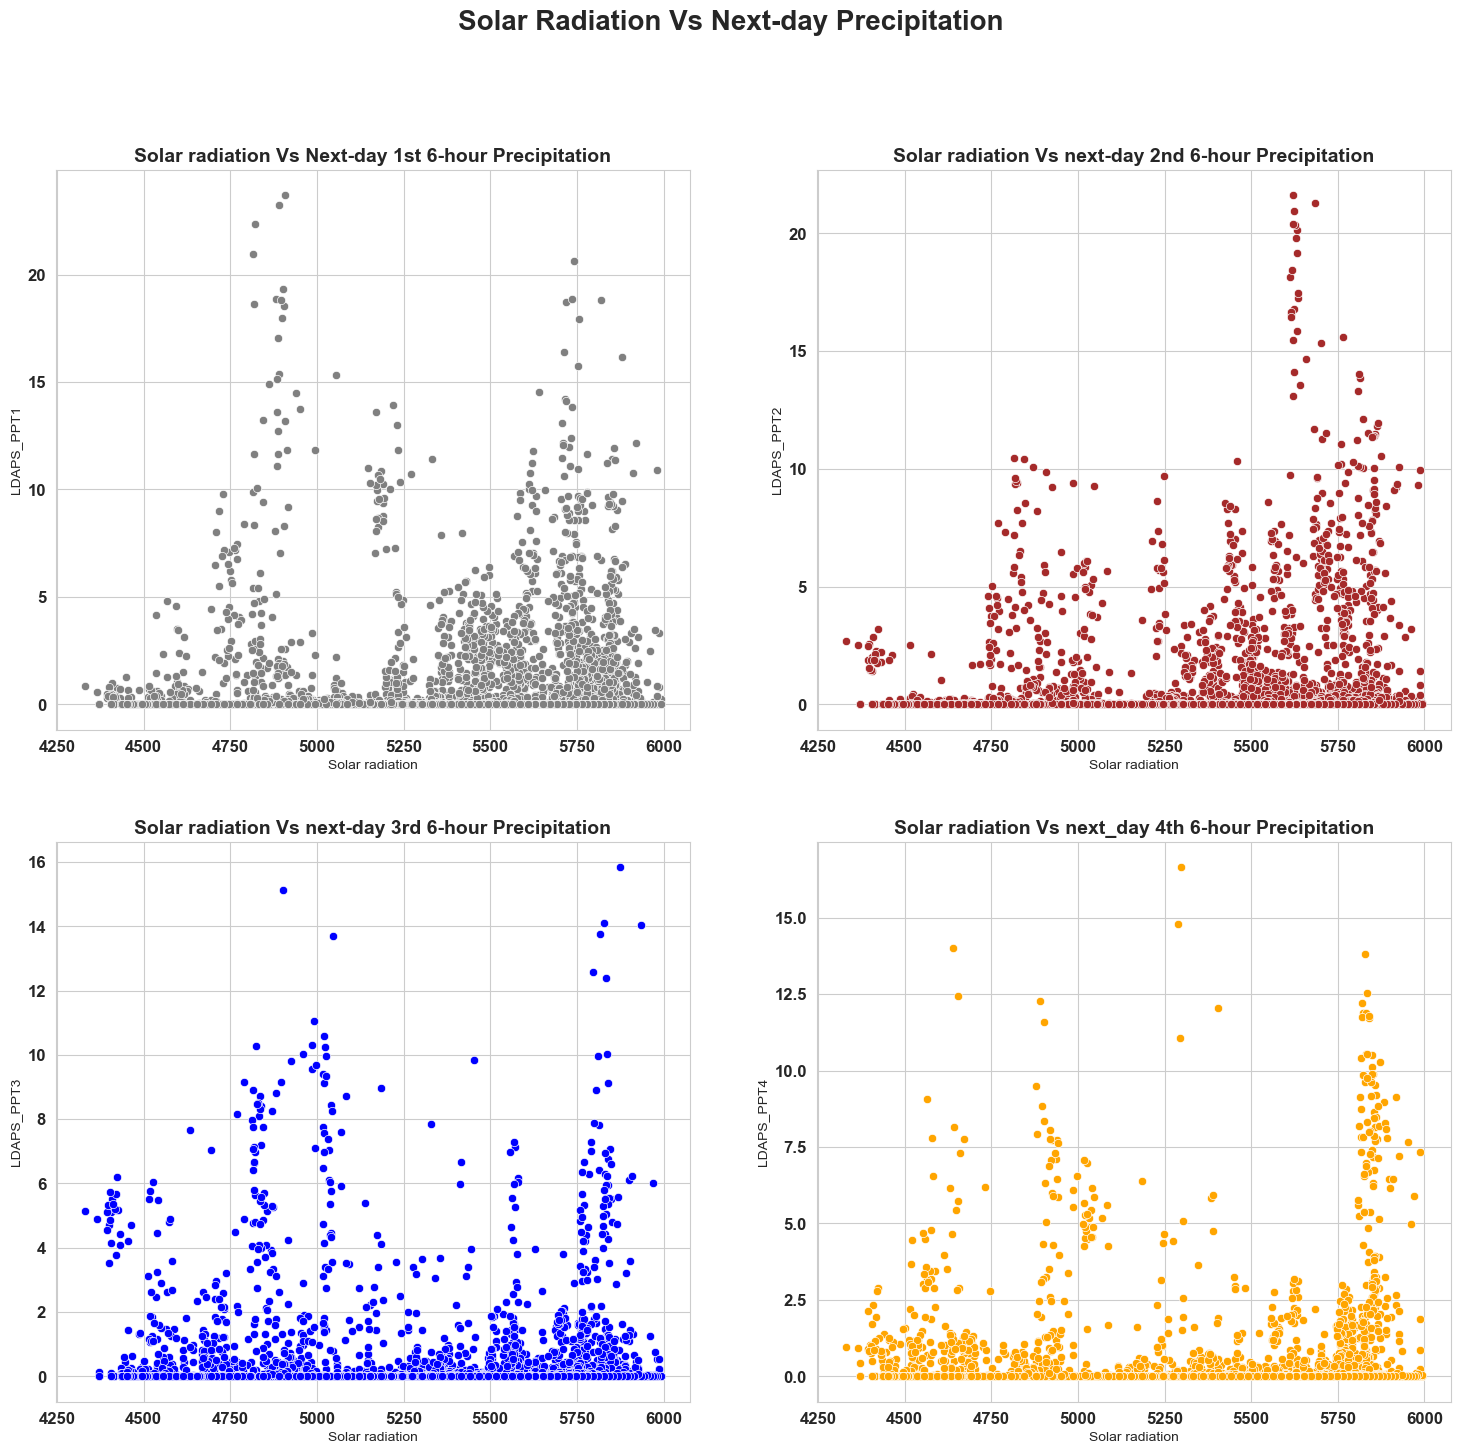

In [29]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day Precipitation',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT1',x='Solar radiation',data=df,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT2',x='Solar radiation',data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT3',x='Solar radiation',data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT4',x='Solar radiation',data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

# Observations and Questions

1. **Solar Radiation and Precipitation:**
   - Irrespective of the 6-hour quarter, readings with solar radiation values greater than 5500 W/m2 tend to have higher precipitation, often exceeding 8.

2. **Solar Radiation vs. Cloud Cover:**
   - Considering the scatter plot of solar radiation vs. cloud cover, it appears that higher values of solar radiation correspond to higher cloud cover. In other words, higher precipitation is associated with higher cloud cover.

3. **Questions for Further Investigation:**
   - Where do relative humidity and wind speed fit into the precipitation equation?
   - How does latent heat flux variation affect relative humidity?
   - Does wind speed change relative to cloud cover, especially when cloud cover is high?
   - What is the variation in precipitation, cloud cover, and wind speed over the year period?
   - How does temperature vary over the duration of one year?

These questions provide avenues for further exploration and analysis to gain a comprehensive understanding of the relationships between various meteorological variables.


<Axes: xlabel='Month', ylabel='LDAPS_PPT1'>

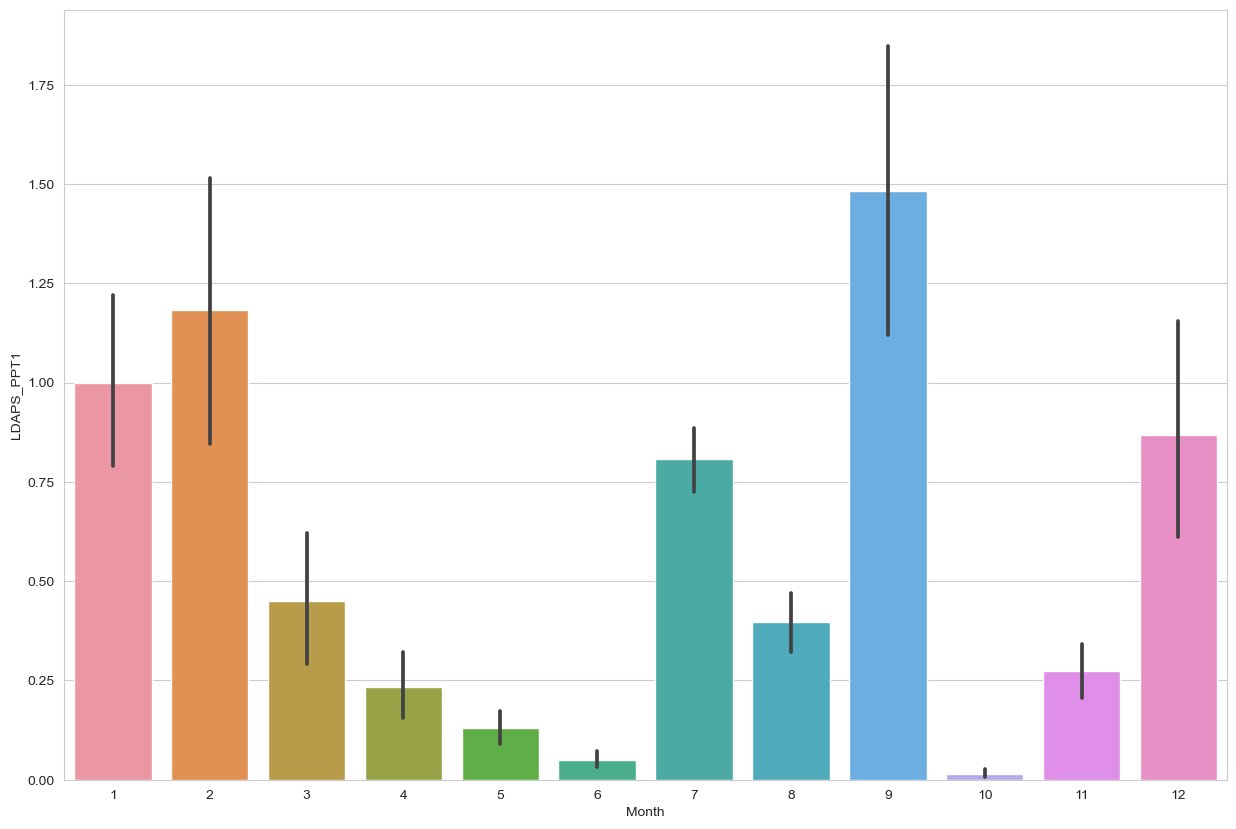

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Month'], y=df['LDAPS_PPT1'])

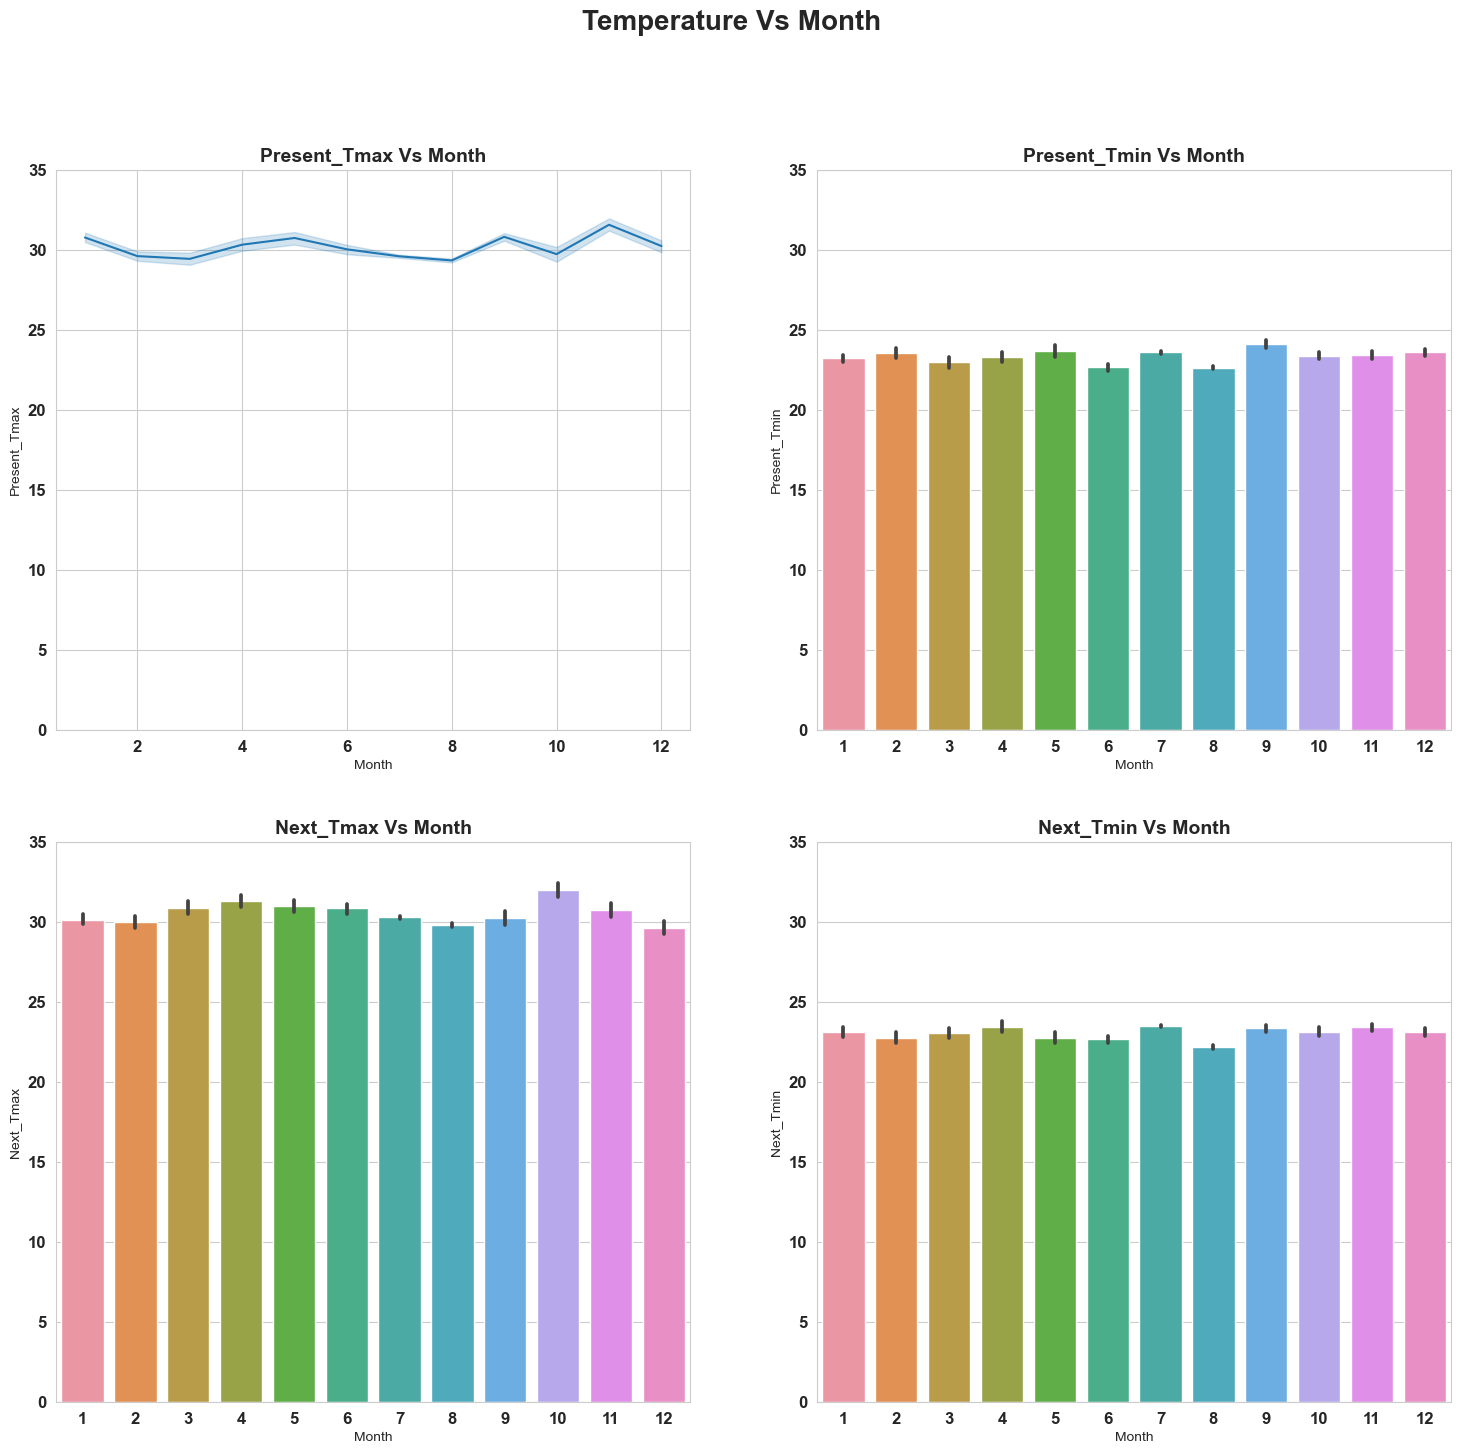

In [31]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Temperature Vs Month',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Present_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.lineplot(y='Present_Tmax',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Present_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Present_Tmin',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmax',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmin',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

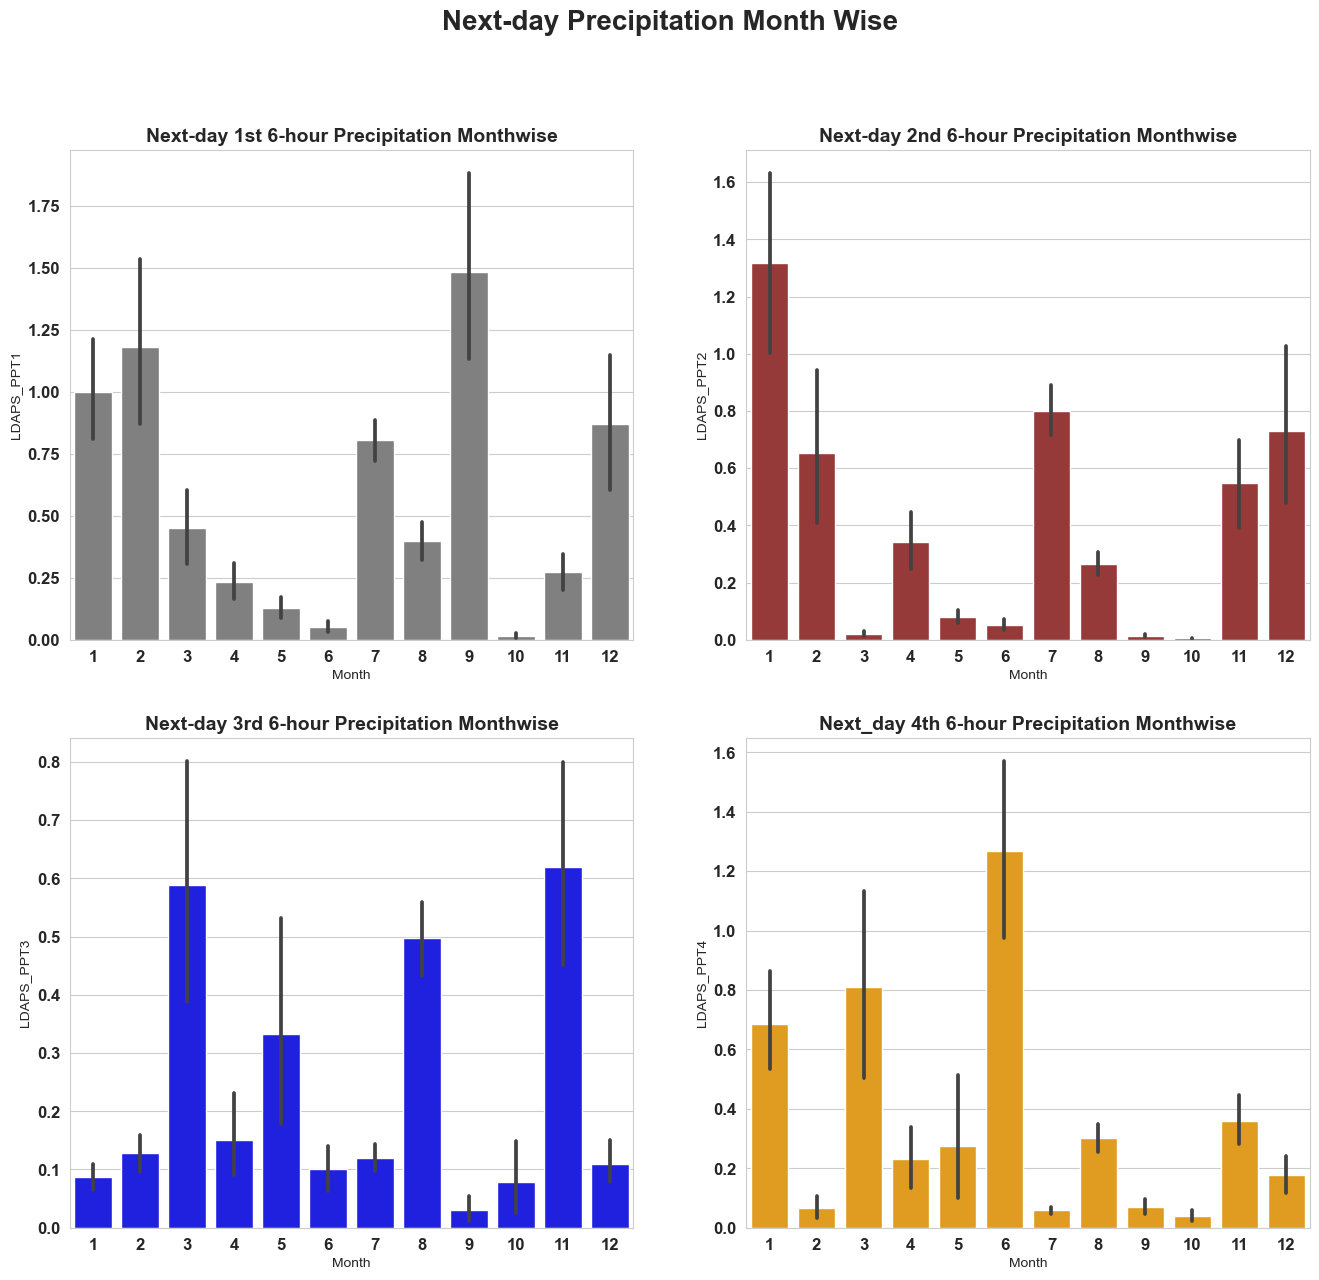

In [32]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(16,14))
plt.suptitle('Next-day Precipitation Month Wise',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next-day 1st 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT1'],data=df,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next-day 2nd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT2'],data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next-day 3rd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT3'],data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_day 4th 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT4'],data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

# Comment

Observing the highest precipitation in different months and quarters of the day:

- In the 9th month, the highest precipitation is observed in the 1st quarter of the day.
- In the 1st month, the highest precipitation is observed in the 2nd quarter of the day.
- In the 11th month, the highest precipitation is observed in the 3rd quarter of the day.
- In the 6th month, the highest precipitation is observed in the 4th quarter of the day.

These observations suggest variations in the timing of peak precipitation across different months, highlighting the temporal dynamics of rainfall throughout the year.


Minimum Solar radiation : 4329.520508
Maximum Solar radiation : 5992.895996
Average Solar radiation : 5343.724207856747


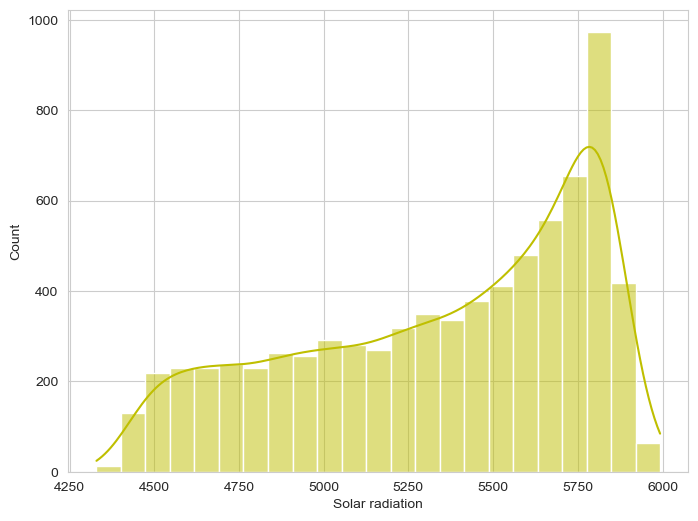

In [33]:
plt.figure(figsize=(8,6))
sns.histplot(df['Solar radiation'],kde=True,color='y')
print('Minimum Solar radiation :',df['Solar radiation'].min())
print('Maximum Solar radiation :',df['Solar radiation'].max())
print('Average Solar radiation :',df['Solar radiation'].mean())

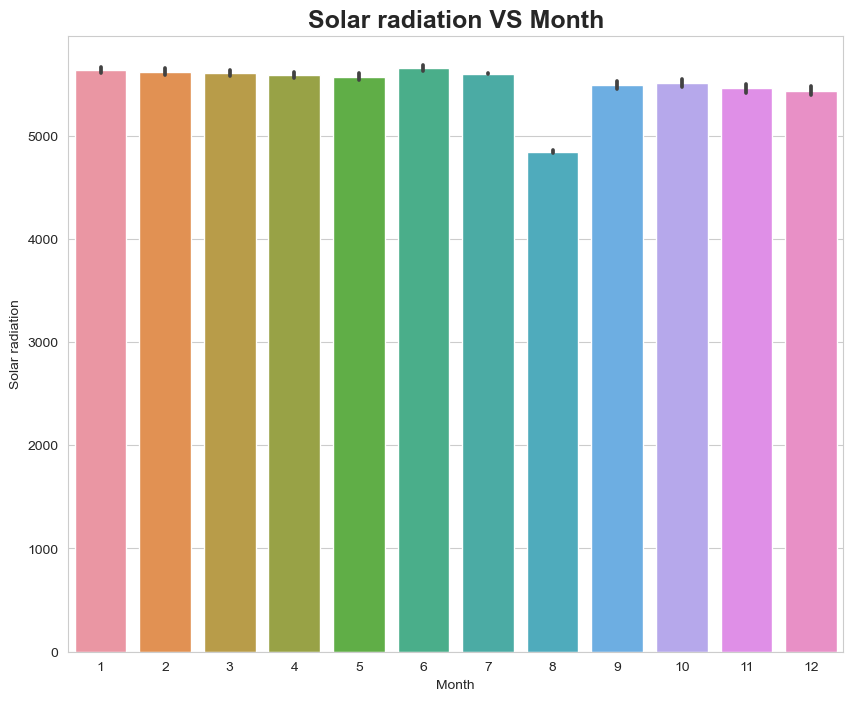

In [34]:
sns.set_palette('husl')
plt.figure(figsize=(10,8))
sns.barplot(y=df['Solar radiation'], x=df['Month'])
plt.title('Solar radiation VS Month',fontsize=18, fontweight='bold')
plt.show()

# Comment

Observations on Solar Radiation Data:

- The distribution of solar radiation data is left-skewed.
- The minimum solar radiation value is 4329.52 Wh/m2, while the maximum value is 5992.89 Wh/m2.
- The majority of readings for solar radiation fall within the range of 5600 to 5850 Wh/m2.
- The minimum solar radiation occurs in the month of August (Month 8).

These insights provide a summary of the distribution and range of solar radiation values in the dataset.


Minimum Wind Speed : 2.882579625 m/s
Maximum Wind Speed : 21.85762099 m/s
Average Wind Speed : 7.0940966991598575 m/s


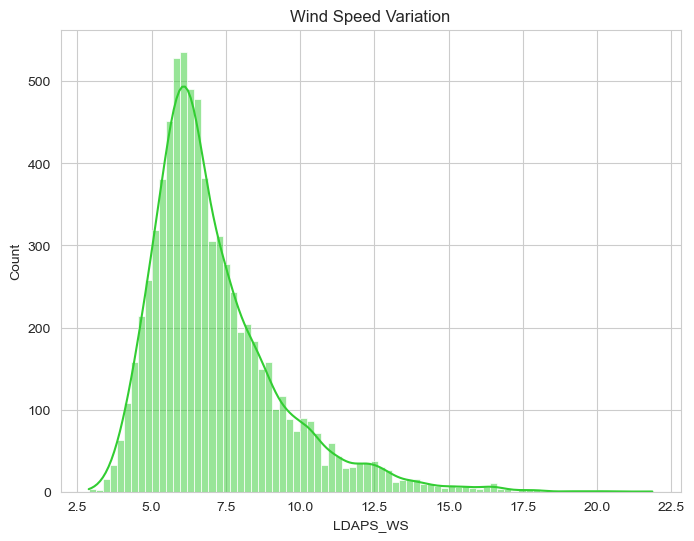

In [35]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_WS'],kde=True,color='limegreen')
plt.title('Wind Speed Variation')
print('Minimum Wind Speed :',df['LDAPS_WS'].min(),'m/s')
print('Maximum Wind Speed :',df['LDAPS_WS'].max(),'m/s')
print('Average Wind Speed :',df['LDAPS_WS'].mean(),'m/s')

Minimum RHmax is 58.93628311 % and Maximum RHmax is 100.0001526 %
Minimum RHmin is 19.79466629 % and Maximum RHmin is 98.5247345 %


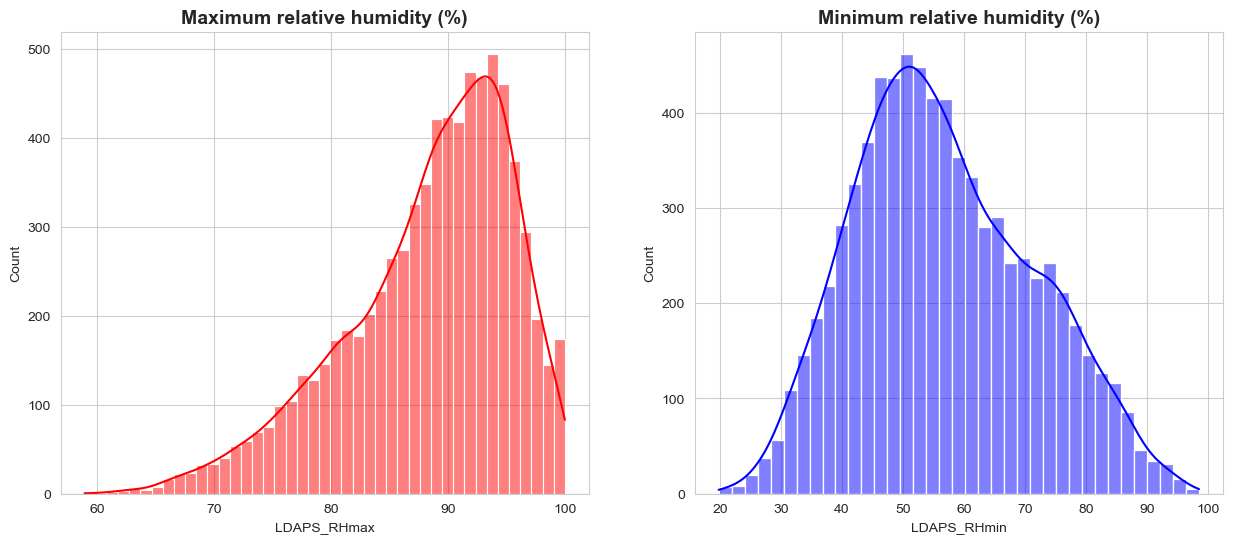

In [36]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_RHmax'],kde=True,color='r')
plt.title('Maximum relative humidity (%)',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_RHmin'],kde=True,color='b')
plt.title('Minimum relative humidity (%)',fontsize=14, fontweight='bold')
print('Minimum RHmax is {} % and Maximum RHmax is {} %'.format(df['LDAPS_RHmax'].min(),df['LDAPS_RHmax'].max()))
print('Minimum RHmin is {} % and Maximum RHmin is {} %'.format(df['LDAPS_RHmin'].min(),df['LDAPS_RHmin'].max()))

# Comment

Observations on Relative Humidity Data:

- The data for Maximum Relative Humidity is left-skewed.
- The data for Minimum Relative Humidity is slightly right-skewed.
- For most days, Maximum Relative Humidity falls within the range of 90 to 97.
- Minimum Relative Humidity is typically observed in the range of 45 to 62.

These observations provide insights into the distribution and range of Maximum and Minimum Relative Humidity values in the dataset.


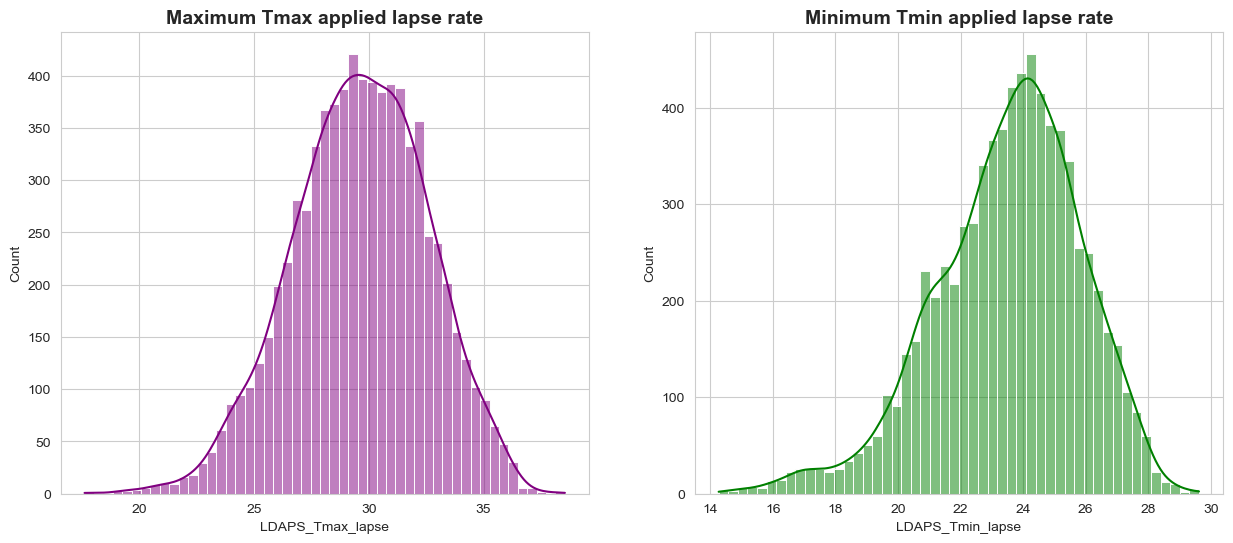

Minimum Tmax applied lapse rate is 17.62495378 (°C) and Maximum Tmax applied lapse rate is 38.54225522 (°C)
Minimum Tmin applied lapse rate is 14.27264631 (°C) and Maximum Tmin applied lapse rate is 29.61934244 (°C)


In [37]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['LDAPS_Tmax_lapse'], kde=True, color='purple')
plt.title('Maximum Tmax applied lapse rate', fontsize=14, fontweight='bold')

plt.subplot(1, 2, 2)
sns.histplot(df['LDAPS_Tmin_lapse'], kde=True, color='green')
plt.title('Minimum Tmin applied lapse rate', fontsize=14, fontweight='bold')

plt.show()

print('Minimum Tmax applied lapse rate is {} (°C) and Maximum Tmax applied lapse rate is {} (°C)'.format(df['LDAPS_Tmax_lapse'].min(), df['LDAPS_Tmax_lapse'].max()))
print('Minimum Tmin applied lapse rate is {} (°C) and Maximum Tmin applied lapse rate is {} (°C)'.format(df['LDAPS_Tmin_lapse'].min(), df['LDAPS_Tmin_lapse'].max()))

# Observation

The applied lapse rate for Tmax and Tmin exhibits the following characteristics:

- Both Tmax and Tmin applied lapse rate distributions appear to be approximately normally distributed.
- For Tmax applied lapse rate, the majority of days have values in the range of 27 to 33 °C.
- For Tmin applied lapse rate, the majority of days have values in the range of 23 to 26 °C.

These observations provide insights into the typical ranges of Tmax and Tmin values after applying the lapse rate.


Minimum Latent Heat Flux : -13.60321209
Maximum Latent Heat Flux : 213.4140062
Average Latent Heat Flux : 62.492606287988


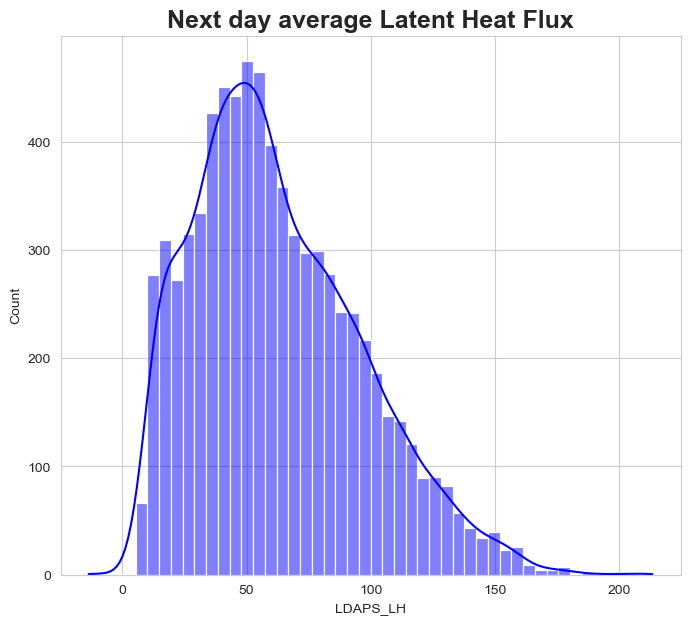

In [38]:
plt.figure(figsize=(8,7))
sns.histplot(df['LDAPS_LH'],kde=True,color='blue')
plt.title('Next day average Latent Heat Flux',fontsize=18, fontweight='bold')
print('Minimum Latent Heat Flux :',df['LDAPS_LH'].min())
print('Maximum Latent Heat Flux :',df['LDAPS_LH'].max())
print('Average Latent Heat Flux :',df['LDAPS_LH'].mean())

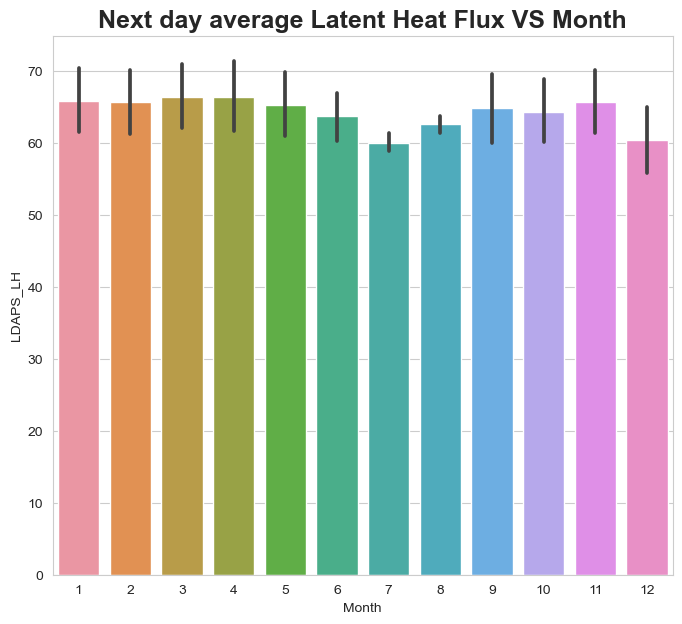

In [39]:
plt.figure(figsize=(8,7))
sns.barplot(y=df['LDAPS_LH'], x=df['Month'])
plt.title('Next day average Latent Heat Flux VS Month',fontsize=18, fontweight='bold')
plt.show()

Minimum Latent Heat Flux observe in month of July.

In [40]:
#Encoding categorical data
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], datetime64[ns]: ['Date'], int64: ['Day', 'Month', 'Year'], object: ['State', 'City']}

In [41]:
# Using Label Encoder on categorical variable
Category = ['State', 'City']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  State  City  
0       21.2   30      6  2013      1     6  
1       22.5   30      6  2013      1     6  
2       23.9   30      6  2013      1     6  
3       24.3   30      6  2013      1     6  
4       22.5   30      6  2013      0     3

In [42]:
# Droping unnecessary columns
df.drop(['Date'], axis=1, inplace=True)

## - Feature selection and Engineering

In [43]:
#Outliers Detection and Removal
df.shape

(7588, 29)

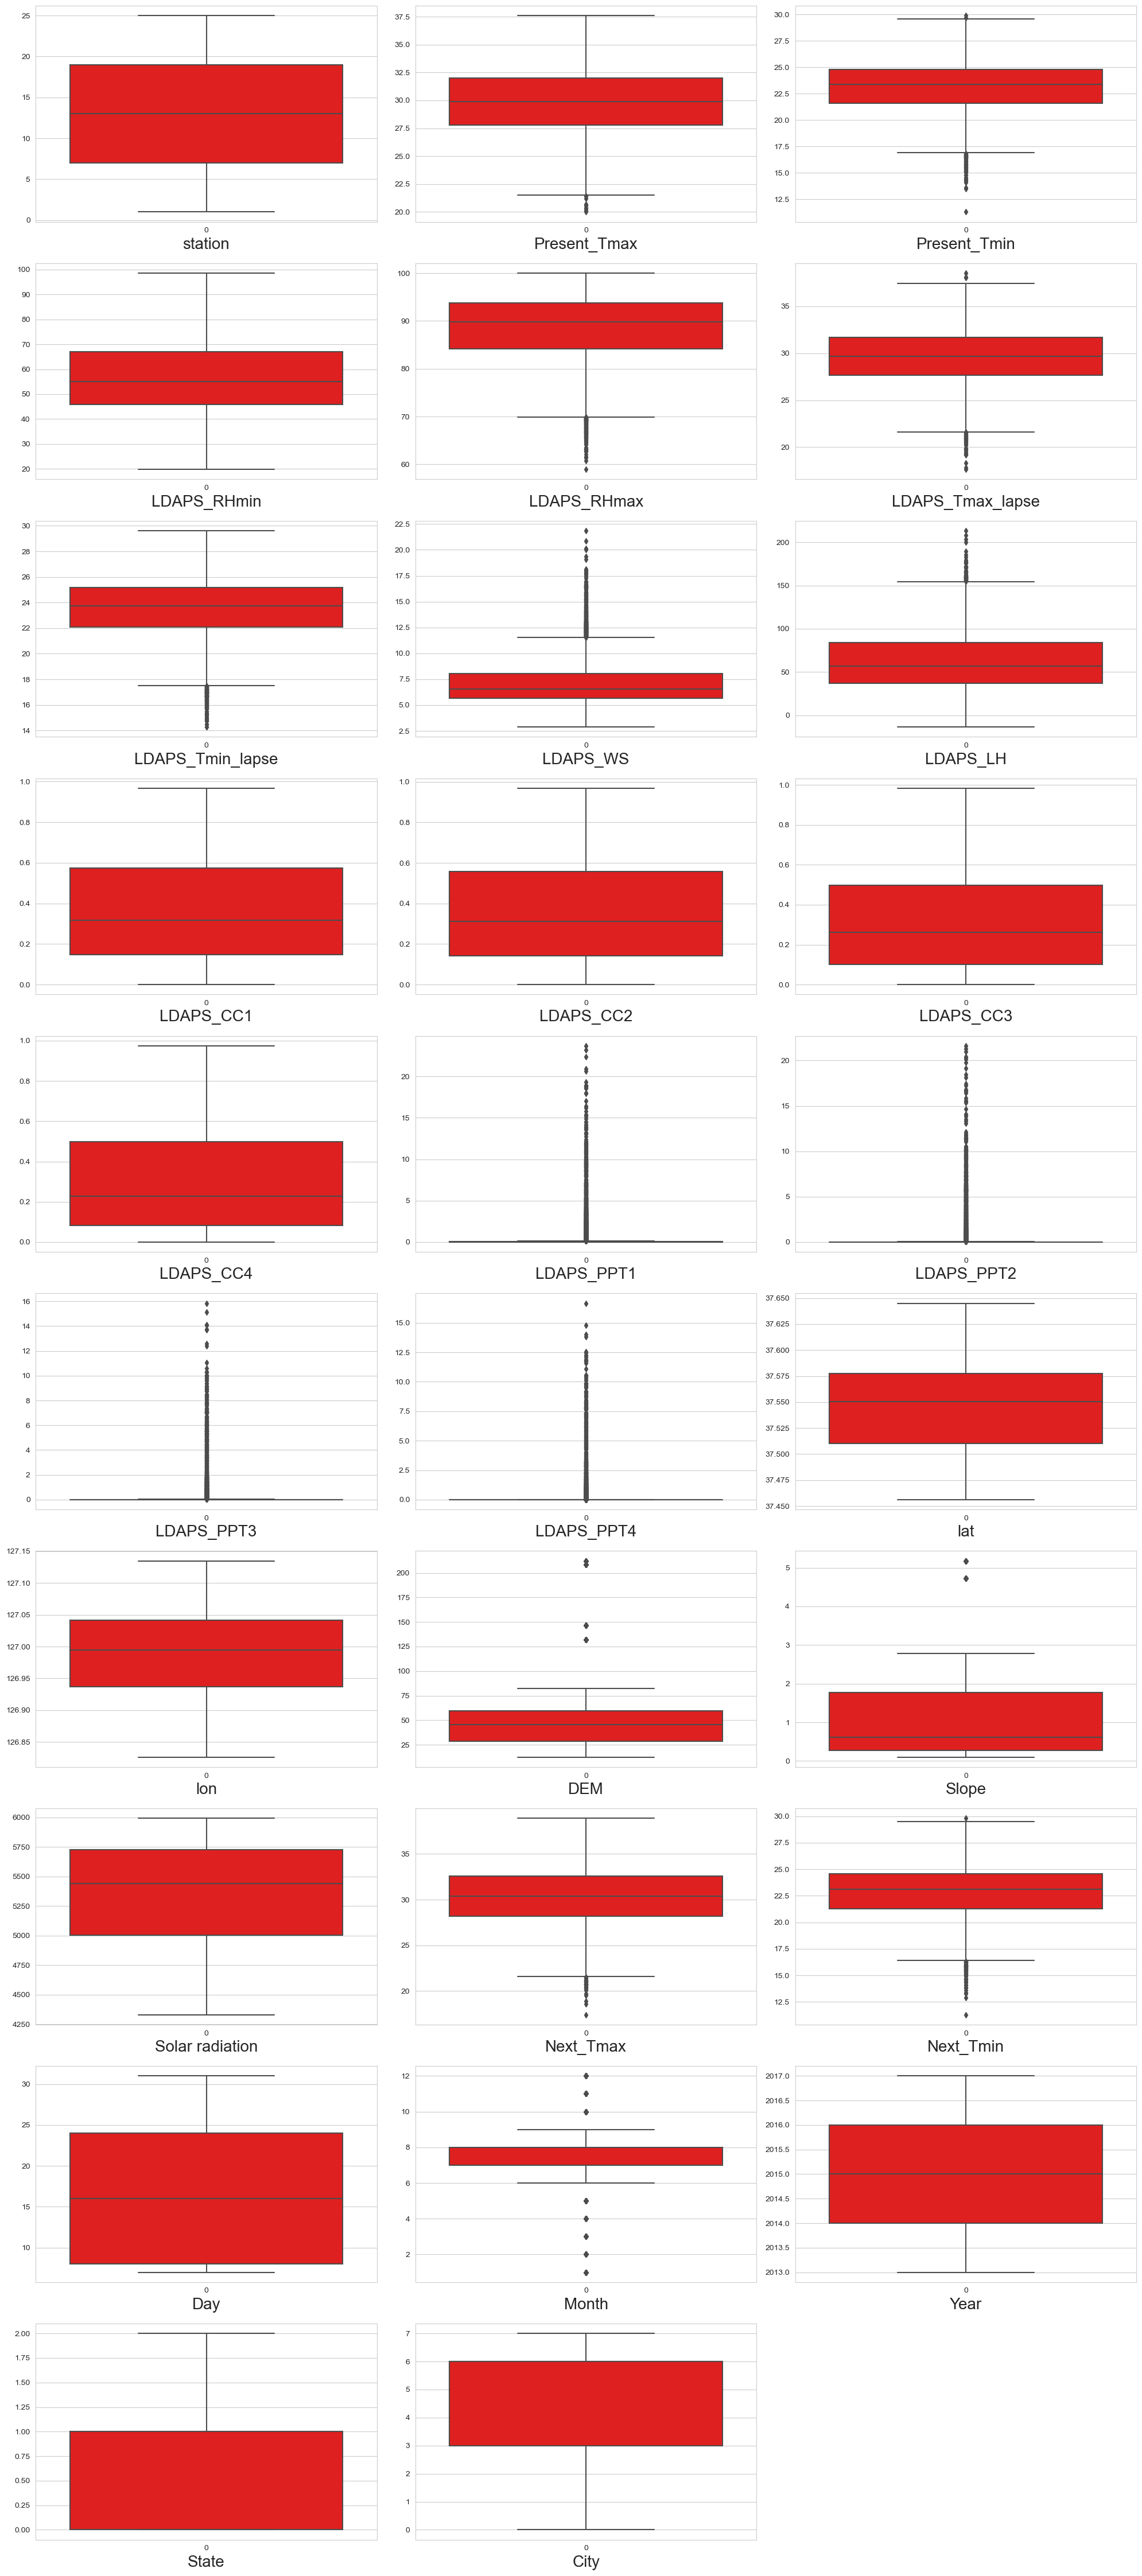

In [44]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [45]:
#Outliers removal using Zscore method
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (7588, 29)
Shape of the dataframe after removing outliers:  (6739, 29)
Percentage of data loss post outlier removal:  11.188719030047443


# Comment

The decision to drop approximately 11.18% of the data is a trade-off between the amount of data retained and the potential impact on the machine learning model. While losing data is not ideal, having a substantial number of rows remaining in the dataset allows for effective model building and analysis. In some cases, it may be acceptable to sacrifice a small portion of the data to ensure the quality and reliability of the remaining dataset for machine learning tasks.


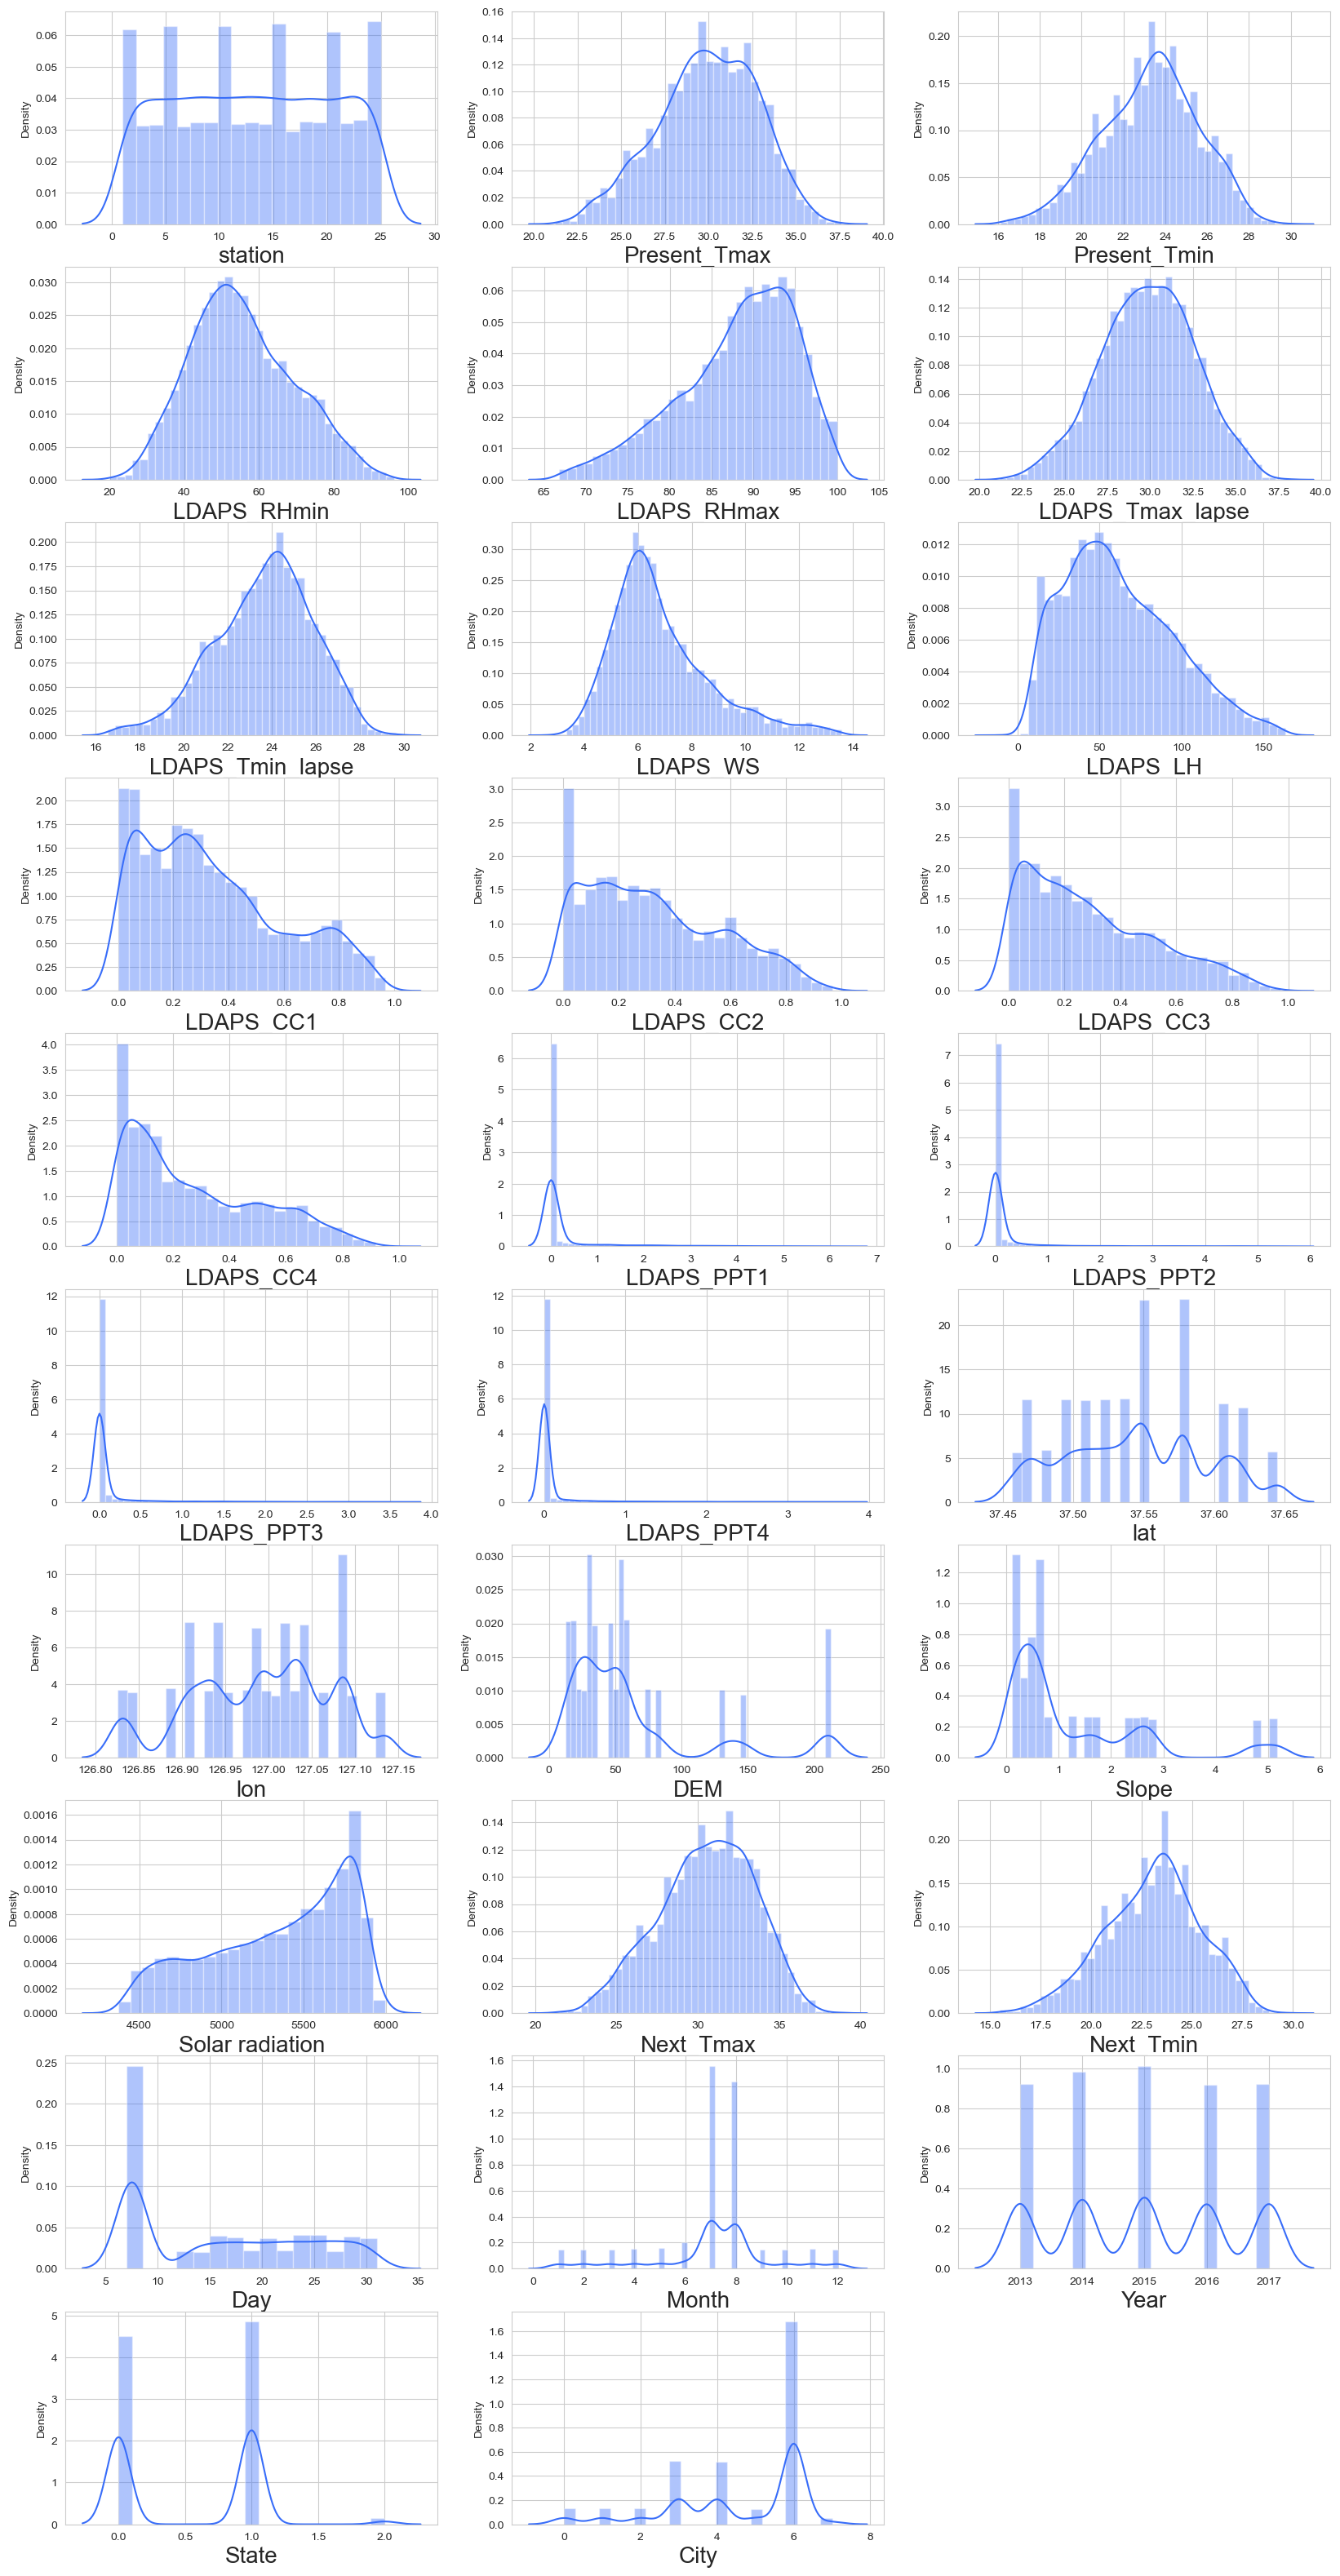

In [46]:
# Skewness of features
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

# Comment

Ignoring skewness in discrete numerical and categorical features, as well as in the target feature, is a reasonable approach. Skewness is typically more relevant for continuous numerical features where the distribution shape can impact statistical modeling and analysis. For discrete numerical features representing categories or months, the concept of skewness may not provide meaningful insights.

Focusing on skewness in continuous numerical features that are crucial for model training and prediction is a more targeted and effective strategy. This ensures that attention is given to the aspects of the data distribution that are directly relevant to the machine learning modeling process.


In [47]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.256528
Month              -0.680725
Year                0.025066
State               0.143188
City               -0.951530
dtype: float64

In [48]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

In [49]:
# Corrleation
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110291      0.133638    -0.069582   
Present_Tmax      0.110291      1.000000      0.610428    -0.154266   
Present_Tmin      0.133638      0.610428      1.000000     0.151385   
LDAPS_RHmin      -0.069582     -0.154266      0.151385     1.000000   
LDAPS_RHmax      -0.182354     -0.320074     -0.053421     0.566069   
LDAPS_Tmax_lapse  0.066863      0.540680      0.441577    -0.555583   
LDAPS_Tmin_lapse  0.108664      0.623443      0.764041     0.114069   
LDAPS_WS          0.030231     -0.071596      0.034364     0.171684   
LDAPS_LH         -0.135717      0.119022     -0.008556    -0.002412   
LDAPS_CC1         0.008671     -0.290078      0.090828     0.574389   
LDAPS_CC2         0.006380     -0.157917      0.117894     0.713238   
LDAPS_CC3         0.006303     -0.061417      0.043629     0.636195   
LDAPS_CC4         0.011510     -0.049978      0.000193     0.459528   
LDAPS_PPT1       -0.001774     -0.190222      0.068506     0.410985   
LDAPS_PPT2       -0.006798     -0.097425      0.090113     0.510241   
LDAPS_PPT3       -0.004884     -0.022348      0.035889     0.405612   
LDAPS_PPT4       -0.000285     -0.021344     -0.063495     0.244139   
lat              -0.241811     -0.052041     -0.072707     0.090054   
lon              -0.122829      0.011132     -0.043201    -0.093969   
DEM              -0.326019     -0.130892     -0.238916     0.057460   
Slope            -0.146034     -0.092409     -0.157839     0.083910   
Solar radiation  -0.034787     -0.099696     -0.047145     0.229070   
Next_Tmax         0.106378      0.586943      0.438813    -0.433872   
Next_Tmin         0.129110      0.615950      0.785946     0.134518   
Day               0.005179     -0.136914     -0.076877    -0.070194   
Month             0.003494      0.039443     -0.019387    -0.070498   
Year              0.006658      0.099185      0.099222     0.001709   
State            -0.107709     -0.049572     -0.073556    -0.078498   
City             -0.172313     -0.028619     -0.032508    -0.060087   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.182354          0.066863          0.108664  0.030231   
Present_Tmax        -0.320074          0.540680          0.623443 -0.071596   
Present_Tmin        -0.053421          0.441577          0.764041  0.034364   
LDAPS_RHmin          0.566069         -0.555583          0.114069  0.171684   
LDAPS_RHmax          1.000000         -0.403634         -0.182113  0.060965   
LDAPS_Tmax_lapse    -0.403634          1.000000          0.624572 -0.154400   
LDAPS_Tmin_lapse    -0.182113          0.624572          1.000000 -0.002164   
LDAPS_WS             0.060965         -0.154400         -0.002164  1.000000   
LDAPS_LH             0.285942          0.005878         -0.143246 -0.056362   
LDAPS_CC1            0.425827         -0.416255          0.023128  0.203057   
LDAPS_CC2            0.372085         -0.492392          0.087752  0.156336   
LDAPS_CC3            0.143375         -0.468317          0.032023  0.065764   
LDAPS_CC4            0.046555         -0.367547         -0.017483  0.090955   
LDAPS_PPT1           0.420202         -0.307565         -0.054475  0.197126   
LDAPS_PPT2           0.368154         -0.344808          0.021320  0.166155   
LDAPS_PPT3           0.219383         -0.285371         -0.018357  0.089355   
LDAPS_PPT4           0.118163         -0.207369         -0.084124  0.167950   
lat                  0.232258         -0.038285         -0.091796 -0.027463   
lon                  0.013059          0.106354         -0.025047 -0.077686   
DEM                  0.174176         -0.110286         -0.174769  0.113157   
Slope                0.209222         -0.105094         -0.160165  0.095385   
Solar radiation      0.154031         -0.034699          0.009890  0.164626   
Next_Tmax           -0.323446          0.816861          0.550810 -0.20

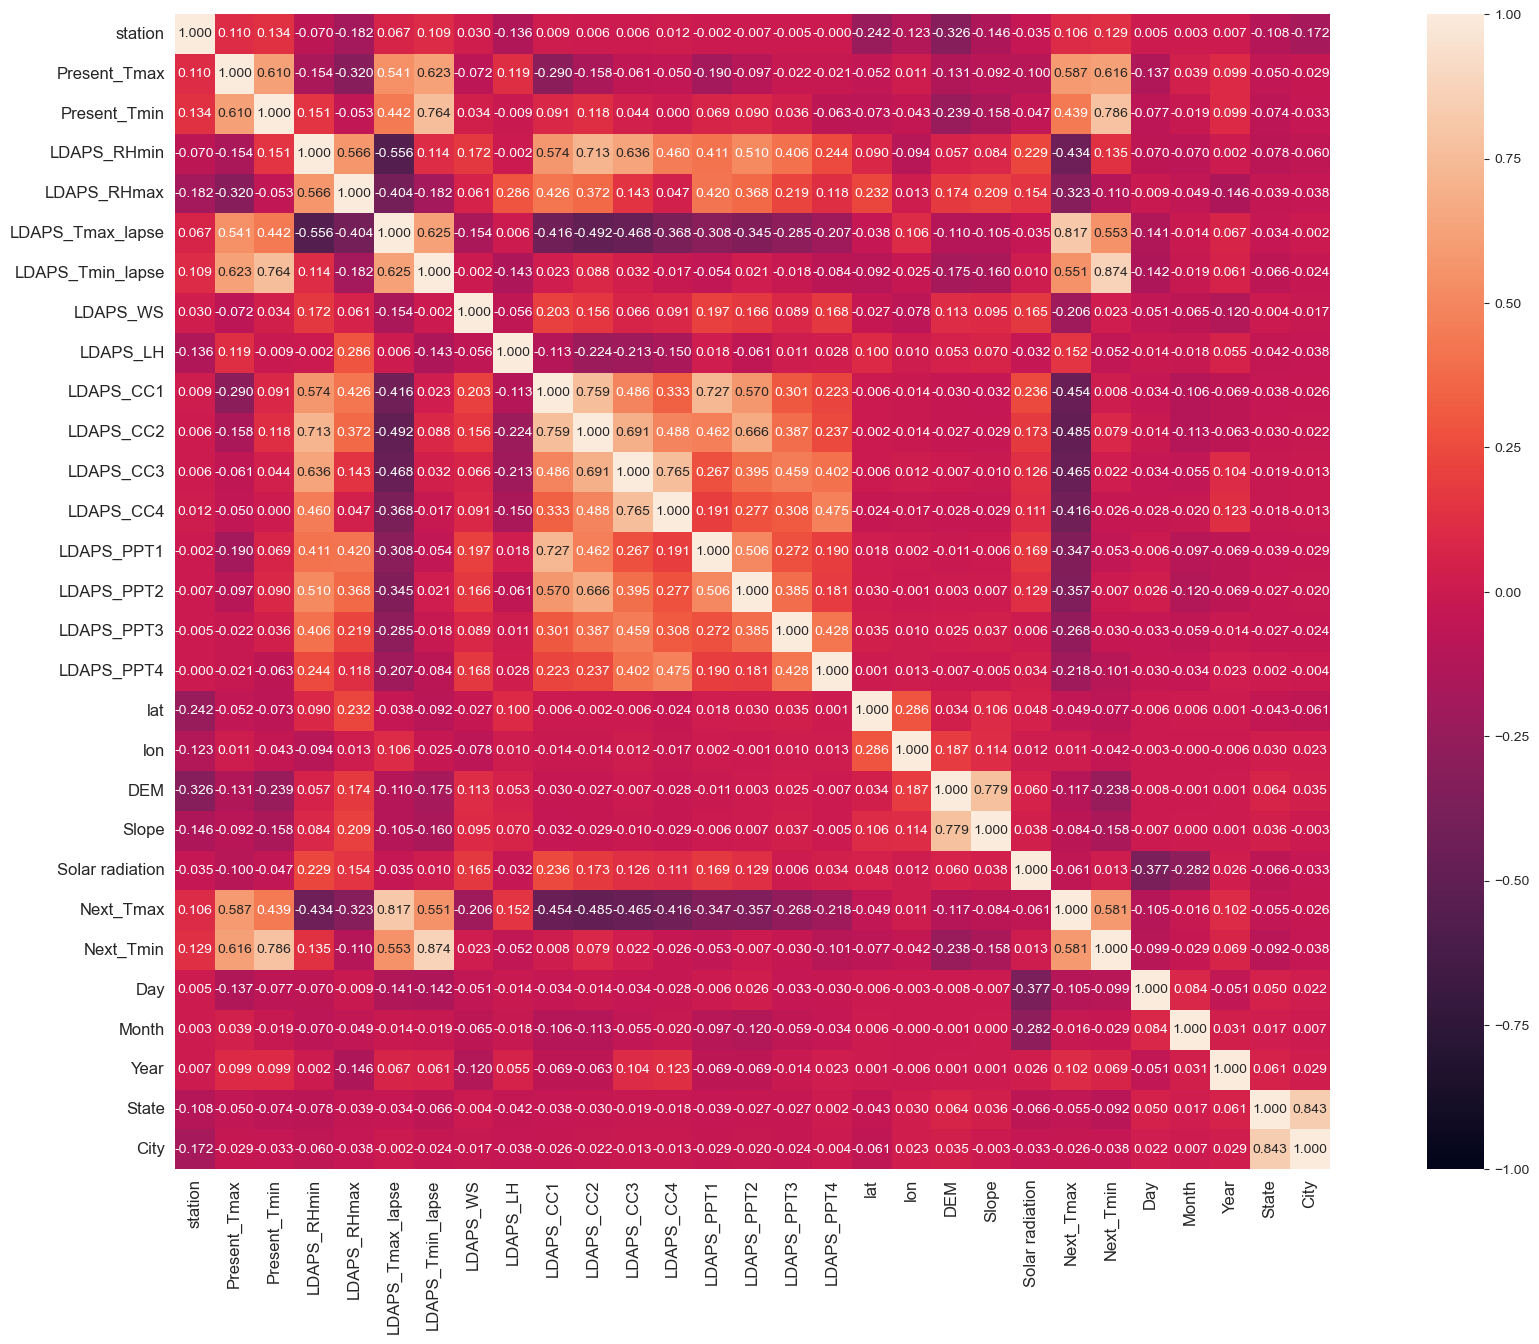

In [50]:
plt.figure(figsize=(25, 15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', annot_kws={'size': 10})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

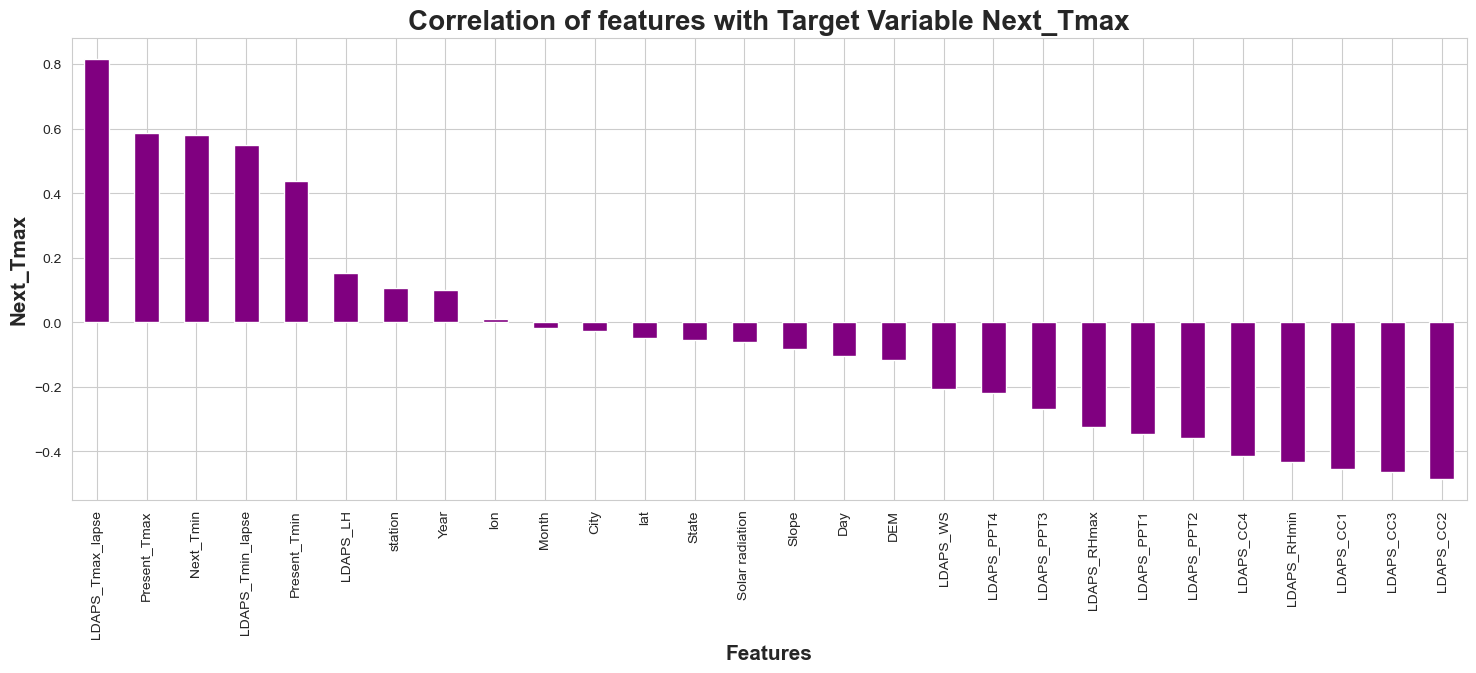

In [51]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmax',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmax',fontsize = 20,fontweight='bold')
plt.show()

Temperature and cloud cover related feature are moderately or highly correlated with Target Feature.

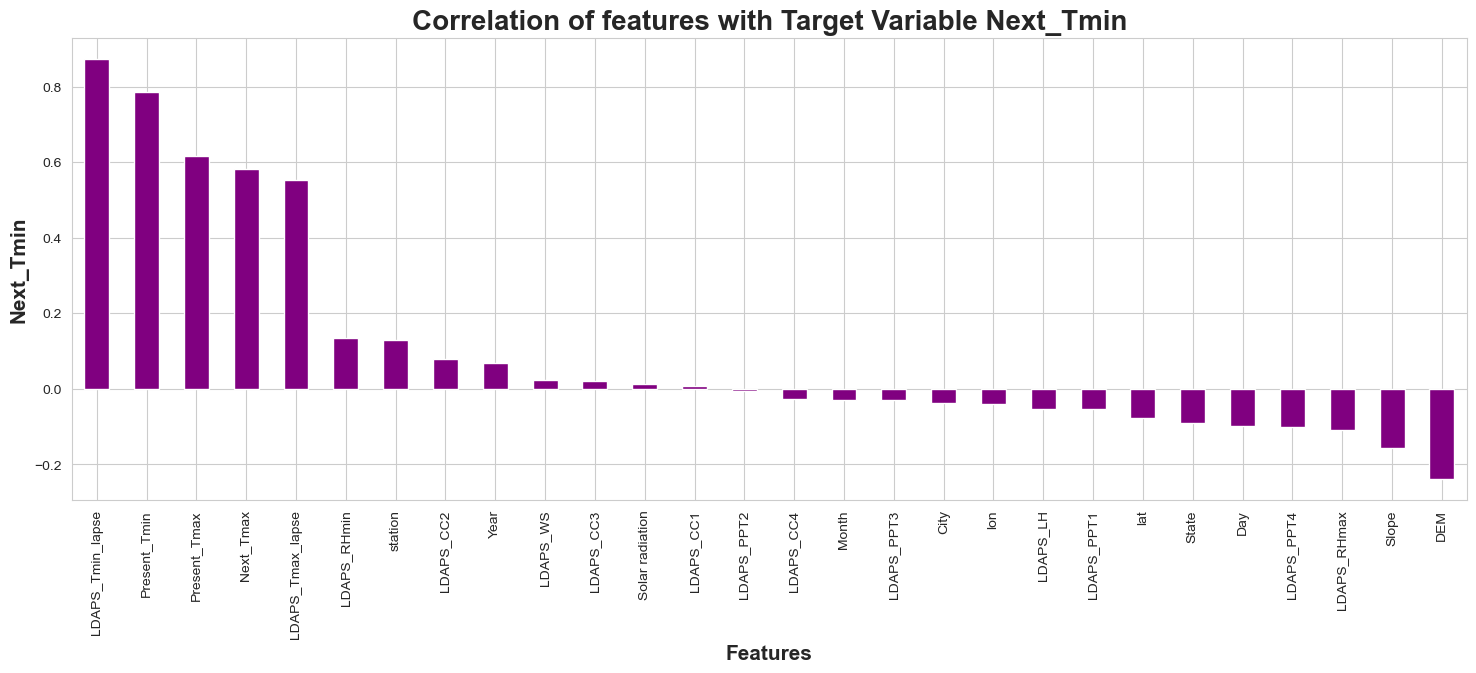

In [52]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmin'].drop(['Next_Tmin']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmin',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmin',fontsize = 20,fontweight='bold')
plt.show()

Temperature related feature are moderately or highly correlated with Target Feature.

## - Machine Learning Model Building For Next_Tmax

In [53]:
# Splitting data in target and dependent feature using Standard scaler
X = df.drop(['Next_Tmax'], axis =1)
Y = df['Next_Tmax']

In [54]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [55]:
#Checking Multicollinearity between features using variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values          Features
0     1.353177           station
1     2.849784      Present_Tmax
2     3.383435      Present_Tmin
3     6.077961       LDAPS_RHmin
4     2.614712       LDAPS_RHmax
5     6.650091  LDAPS_Tmax_lapse
6     8.235731  LDAPS_Tmin_lapse
7     1.225322          LDAPS_WS
8     1.523389          LDAPS_LH
9     4.874106         LDAPS_CC1
10    5.533647         LDAPS_CC2
11    4.567857         LDAPS_CC3
12    2.792518         LDAPS_CC4
13    2.601274        LDAPS_PPT1
14    2.174592        LDAPS_PPT2
15    1.592341        LDAPS_PPT3
16    1.601009        LDAPS_PPT4
17    1.310633               lat
18    1.225664               lon
19    3.382228               DEM
20    2.876560             Slope
21    1.487825   Solar radiation
22    5.674284         Next_Tmin
23    1.259835               Day
24    1.122200             Month
25    1.136580              Year
26    3.615665             State
27    3.641816              City

Independent feature VIF is within permissible limit of 10

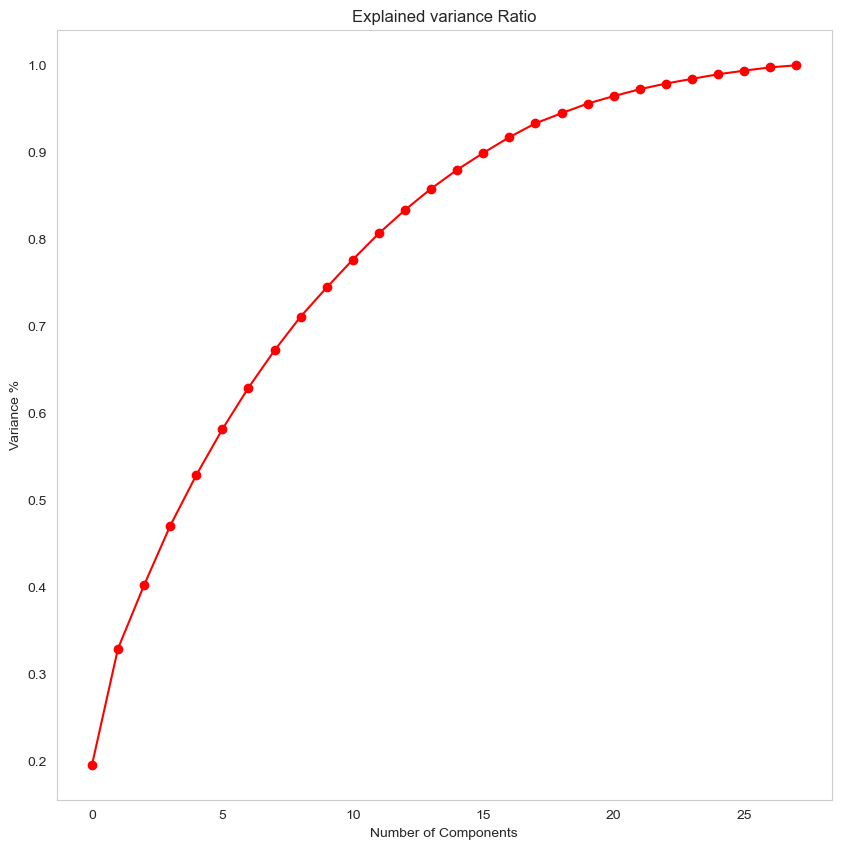

In [56]:
#PCA
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

# Comment

The heatmap of the correlation matrix suggests that 15 principal components capture approximately 90% of the variation in the data. This indicates that these 15 components are sufficient to represent the majority of the information in the dataset. Utilizing these components for prediction can help reduce dimensionality while retaining a significant portion of the data's variability, which is beneficial for model efficiency and interpretability.

In [57]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_scale)

In [58]:
principle_x=pd.DataFrame(x_new,columns=np.arange(15))

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 15)
Training target vector size: (4515,)
Test feature matrix size: (2224, 15)
Test target vector size: (2224,)


In [61]:
#Finding best Random state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8018242128787927 on Random_state 108


In [62]:
#Linear Regression Base Model
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=108, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [31.91671752 30.15944717 29.11536556 ... 25.88094278 25.16676324
 32.69812886]


Actual Wins:
 934     32.0
4582    30.1
7277    27.8
4776    27.6
3755    29.8
        ... 
7096    36.7
7148    35.4
7667    28.4
5063    24.0
4239    32.6
Name: Next_Tmax, Length: 2224, dtype: float64


In [63]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 1.0149506546344917
Mean squared error : 1.7458225721115161
Root Mean Squared Error: 1.3212957928153393


 R2 Score :
0.8018242128787927


In [64]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.6695150338019878


In [65]:
#Applying other ML Models
from sklearn.ensemble import BaggingRegressor
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.7080660971223025
Mean squared error : 0.8749722846223024
Root Mean Squared Error: 0.9353995320836452


 R2 Score :
0.9006781536771253


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.6055436151079139
Mean squared error : 0.6493563116007197
Root Mean Squared Error: 0.8058264773514952


 R2 Score :
0.9262887877443615


 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.0494604316546763
Mean squared error : 2.0877428057553953
Root Mean Squared Error: 1.4449023516332844


 R2 Score :
0.7630113847498213


 Error of  AdaBoostRegressor() :
Mean absolute error : 1.168360433197317
Mean squared error : 2.045842550169929
Root Mean Squared Error: 1.4303295250290855


 R2 Score :
0.7677676619705853


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.83521429389768
Mean squared error : 1.1564020805495885
Root Mean Squared Error: 1.0753613720743314


 R2 Score :
0.8687318538536584


 Error of  XGBRegre

In [66]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.6849298145457661


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.688083898778193


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.42408790372577887


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.6450504421835503


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.7066348061524867


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max

In [70]:
#Hyper Parameter Tuning : GridSearchCV
from sklearn.model_selection import GridSearchCV
parameter = {
    'n_estimators': [200, 400],
    'gamma': [0, 0.1],
    'booster': ['gbtree', 'dart'],
    'max_depth': [4, 6],
    'eta': [0.01, 0.1]
}

In [71]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)

In [72]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5; 1/32] START booster=gbtree, eta=0.01, gamma=0, max_depth=4, n_estimators=200
[CV 1/5; 1/32] END booster=gbtree, eta=0.01, gamma=0, max_depth=4, n_estimators=200;, score=0.764 total time=   0.1s
[CV 2/5; 1/32] START booster=gbtree, eta=0.01, gamma=0, max_depth=4, n_estimators=200
[CV 2/5; 1/32] END booster=gbtree, eta=0.01, gamma=0, max_depth=4, n_estimators=200;, score=0.767 total time=   0.1s
[CV 3/5; 1/32] START booster=gbtree, eta=0.01, gamma=0, max_depth=4, n_estimators=200
[CV 3/5; 1/32] END booster=gbtree, eta=0.01, gamma=0, max_depth=4, n_estimators=200;, score=0.763 total time=   0.1s
[CV 4/5; 1/32] START booster=gbtree, eta=0.01, gamma=0, max_depth=4, n_estimators=200
[CV 4/5; 1/32] END booster=gbtree, eta=0.01, gamma=0, max_depth=4, n_estimators=200;, score=0.777 total time=   0.1s
[CV 5/5; 1/32] START booster=gbtree, eta=0.01, gamma=0, max_depth=4, n_estimators=200
[CV 5/5; 1/32] END booster=gbtree, eta=0

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'booster': ['gbtree', 'dart'], 'eta': [0.01, 0.1],
                         'gamma': [0, 0.1], 'max_depth': [4, 6],
                         'n_estimators': [200, 400]},
             verbose=10)

In [73]:
GCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'gamma': 0,
 'max_depth': 6,
 'n_estimators': 400}

In [75]:
#Final Regression Model
Final_mod =  XGBRegressor(n_estimators=400 , booster= 'gbtree', eta= 0.1, max_depth= 6, gamma= 0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.5771503180908643
Mean squared error : 0.5933707779779712
Root Mean Squared Error: 0.7703056393263463


 R2 Score of Final Model :
0.9326439451184984




True Values Vs Predicted Value plot :


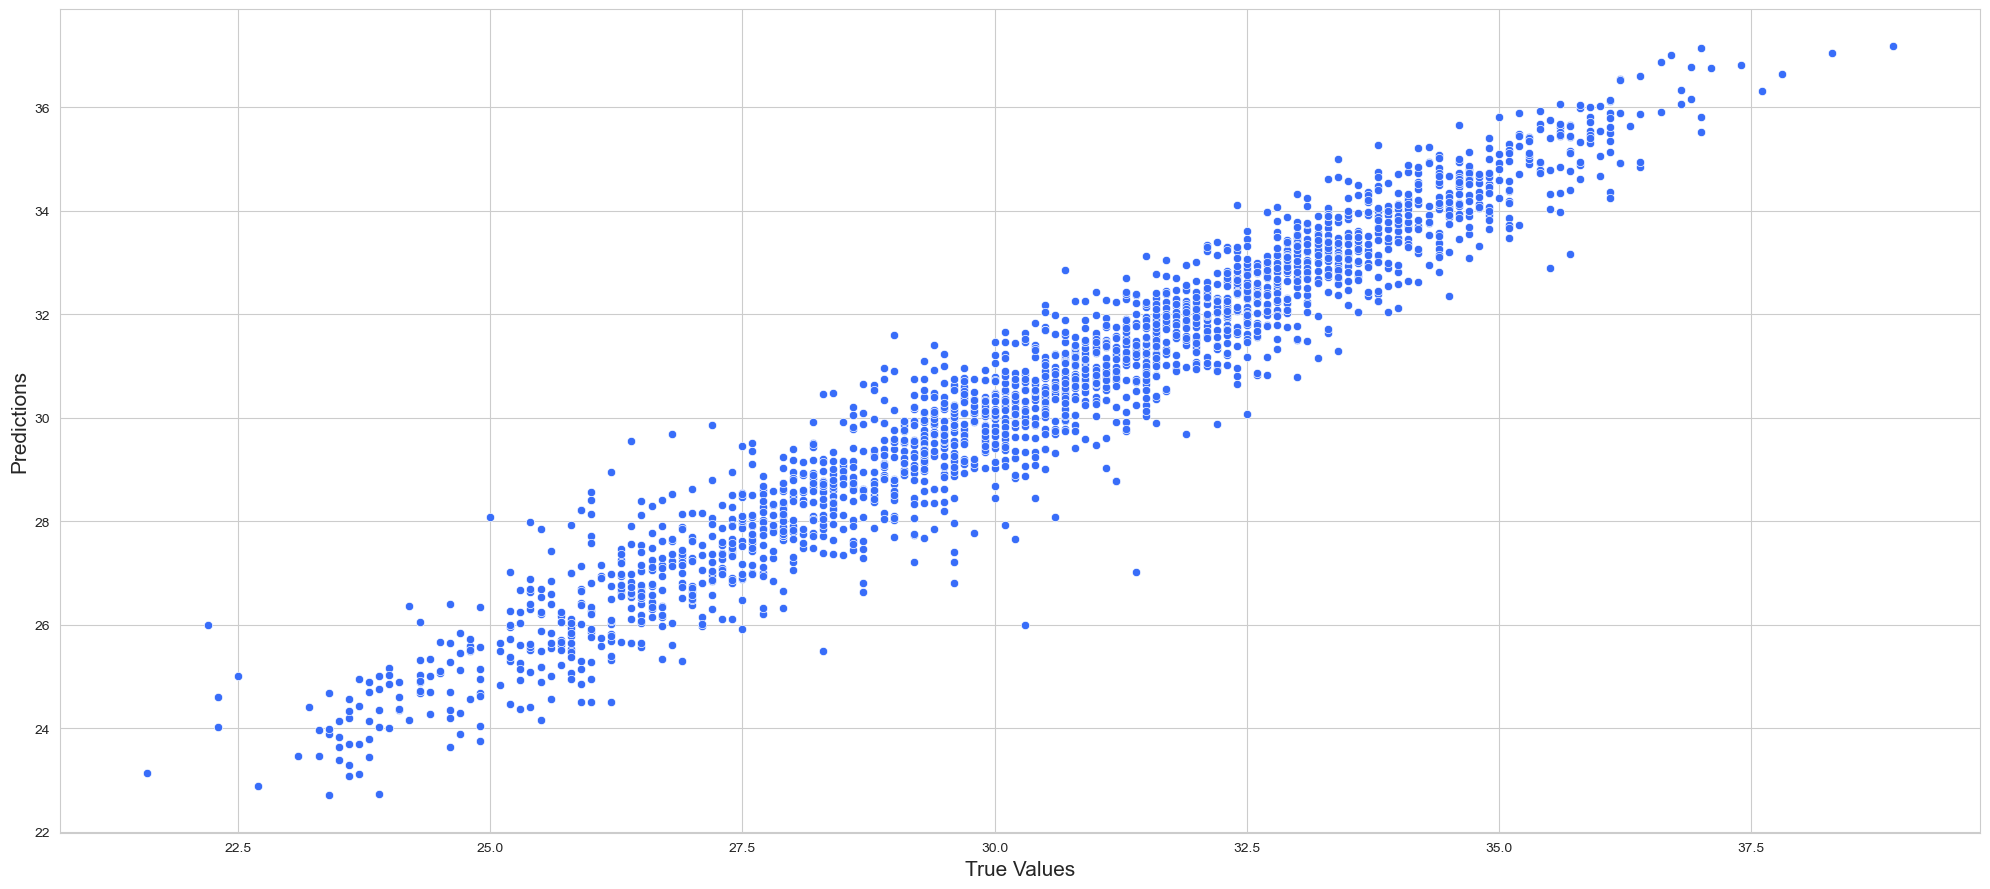

In [77]:
plt.figure(figsize=(20, 9))
y_pred = Final_mod.predict(X_test)

# Create a DataFrame for true and predicted values
plot_data = pd.DataFrame({'True Values': Y_test.round(2), 'Predicted Values': y_pred})

# Scatter plot
sns.scatterplot(x='True Values', y='Predicted Values', data=plot_data)
print('\033[1m' + 'True Values Vs Predicted Value plot :' + '\033[0m')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()
plt.show()

In [78]:
# Final Regression Saving Model
import joblib
joblib.dump(Final_mod,'Next_Tmax_Forecast_Final.pkl')

['Next_Tmax_Forecast_Final.pkl']

In [79]:
# Loading the saved model
Model = joblib.load("Next_Tmax_Forecast_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 

Actual Values  Predicted Values
0              32.0         31.512531
1              30.1         30.230930
2              27.8         28.581261
3              27.6         27.153631
4              29.8         30.134033
...             ...               ...
2219           36.7         37.001499
2220           35.4         34.939396
2221           28.4         28.112974
2222           24.0         24.000687
2223           32.6         32.211906

[2224 rows x 2 columns]

## - Machine Learning Model Building For Next_Tmin

In [81]:
#Standard Scaling
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmin'], axis =1)
Y = df['Next_Tmin']

In [82]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 28)
Training target vector size: (4515,)
Test feature matrix size: (2224, 28)
Test target vector size: (2224,)


In [84]:
#Finding best Random state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8512433756352809 on Random_state 43


In [85]:
#Linear Regression Base Model
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=43, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [23.43531019 24.60008496 23.1360548  ... 22.51619756 26.46938431
 25.3600731 ]


Actual Wins:
 5006    23.0
947     25.6
3726    23.0
715     22.1
4242    24.0
        ... 
4097    24.6
3186    17.1
6641    23.1
3854    26.2
1190    25.7
Name: Next_Tmin, Length: 2224, dtype: float64


In [86]:
#Linear Regression Evaluation Matrix
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.7363156513347725
Mean squared error : 0.8575992359401751
Root Mean Squared Error: 0.9260665396936524


 R2 Score :
0.8512433756352809


In [87]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7878211798629868


In [88]:
#Applying other ML Models
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')




 Error of  RandomForestRegressor() :
Mean absolute error : 0.5528848920863312
Mean squared error : 0.5294893534172664
Root Mean Squared Error: 0.7276601908976926


 R2 Score :
0.9081563444199421


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.5179217625899282
Mean squared error : 0.4636251052158274
Root Mean Squared Error: 0.6809002167835074


 R2 Score :
0.9195809619081152


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.8142535971223022
Mean squared error : 1.202513489208633
Root Mean Squared Error: 1.096591760505537


 R2 Score :
0.7914155704539424


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.8328830010079543
Mean squared error : 1.0607263708615413
Root Mean Squared Error: 1.0299157105615688


 R2 Score :
0.8160095442120832


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.605057976543417
Mean squared error : 0.5924281936590428
Root Mean Squared Error: 0.7696935712730377


 R2 Score :
0.8972391595351713


 Error of  XGBRegr

In [89]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.7938524753258622


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.7961852893806756


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.5978908024465319


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.7449965723696518


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.8031405660441344


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max

In [90]:
#Hyper Parameter Tuning : GridSearchCV
from sklearn.model_selection import GridSearchCV
parameter = {'n_estimators':[50,75,100],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [91]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.075 total time=   0.0s
[CV 2/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 2/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.072 total time=   0.0s
[CV 3/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 3/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.072 total time=   0.0s
[CV 4/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 4/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=0.071 total time=   0.0s
[CV 5/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 5/5; 1/

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'booster': ['gbtree', 'dart', 'gblinear'],
                         'eta': [0.001, 0.01, 0.1], 'gamma': array([0. , 0.1]),
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 75, 100]},
             verbose=10)

In [92]:
GCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'gamma': 0.0,
 'max_depth': 6,
 'n_estimators': 100}

In [93]:
#Final Regression Model For Next_Tmin
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 8, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.469492640769739
Mean squared error : 0.38984467319304195
Root Mean Squared Error: 0.6243754264807688


 R2 Score of Final Model :
0.9323786972044253




True Values Vs Predicted Value plot :


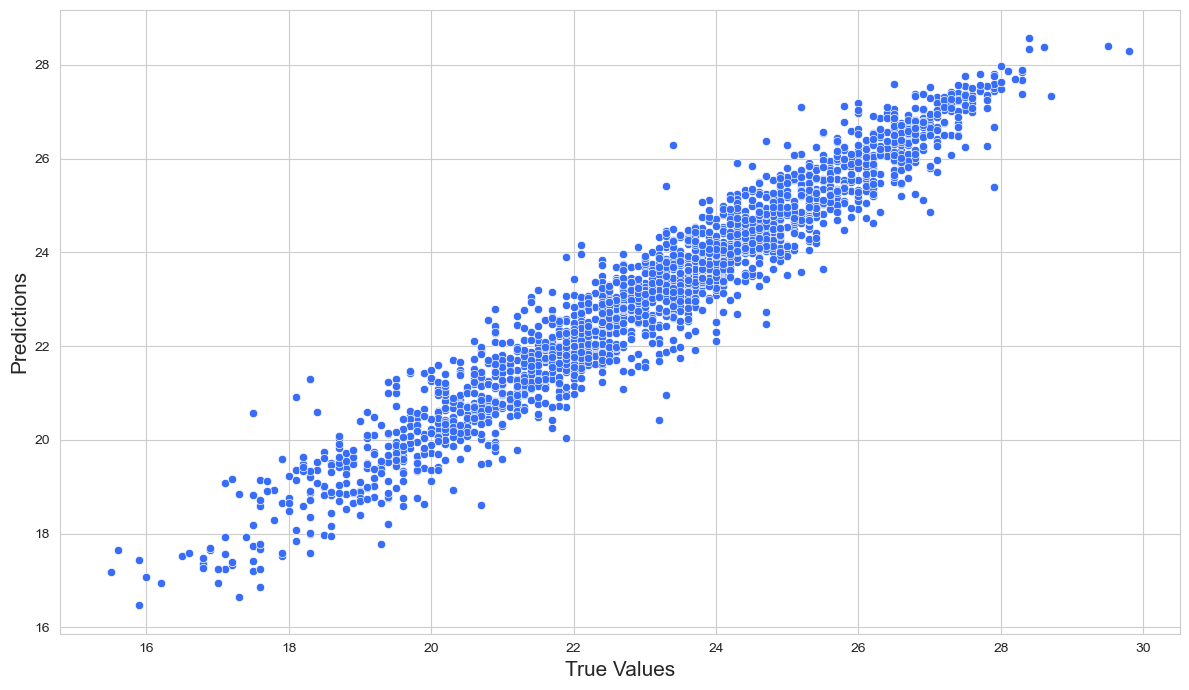

In [95]:
plt.figure(figsize=(12, 7))
y_pred = Final_mod.predict(X_test)
sns.scatterplot(x=Y_test.round(2), y=y_pred)
print('\033[1m' + 'True Values Vs Predicted Value plot :' + '\033[0m')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()
plt.show()

In [96]:
#Saving Final Regression Model For Next_Tmin
import joblib
# prediction  DataFrame
joblib.dump(Final_mod,'Next_Tmin_Forecast_Final.pkl')

['Next_Tmin_Forecast_Final.pkl']

In [97]:
# Loading the saved model
Model = joblib.load("Next_Tmin_Forecast_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 

Actual Values  Predicted Values
0              23.0         23.705284
1              25.6         25.644634
2              23.0         22.844643
3              22.1         22.776205
4              24.0         23.978851
...             ...               ...
2219           24.6         24.098038
2220           17.1         17.571526
2221           23.1         23.170074
2222           26.2         25.882547
2223           25.7         25.309605

[2224 rows x 2 columns]

## Conclusion

Utilizing the powerful **XGBoostRegressor**, we successfully built separate models for predicting the minimum and maximum temperatures for the next day. Both models demonstrated an impressive accuracy of **93%**, showcasing the effectiveness of XGBoost in capturing the underlying patterns in the dataset. The feature importance analysis provided valuable insights, emphasizing the model's ability to discern key factors contributing to temperature predictions. The decision to employ XGBoost for this task proved to be optimal, resulting in robust and accurate temperature forecasts for future use.


<img src="https://cdn.tutsplus.com/cdn-cgi/image/width=360/psd/uploads/2014/02/NYC_Snowfall.gif" alt="Snowfall GIF" width="300">